## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---
## First, I'll compute the camera calibration using chessboard images

./camera_cal/calibration6.jpg


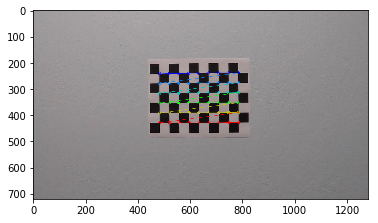

./camera_cal/calibration7.jpg


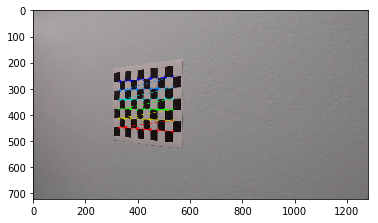

./camera_cal/calibration3.jpg


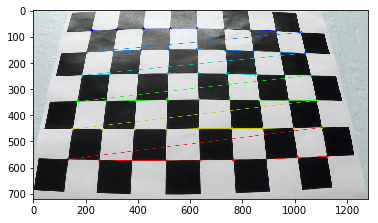

./camera_cal/calibration2.jpg


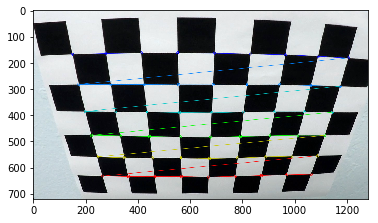

./camera_cal/calibration20.jpg


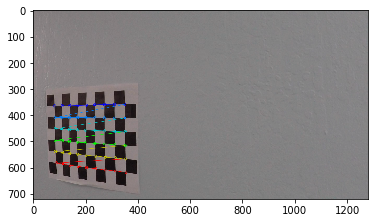

./camera_cal/calibration19.jpg


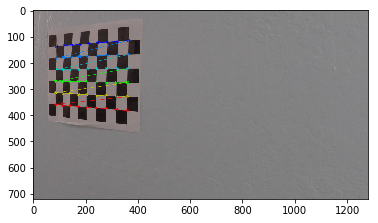

./camera_cal/calibration18.jpg


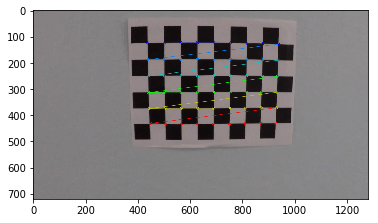

./camera_cal/calibration15.jpg


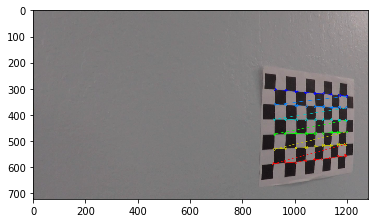

./camera_cal/calibration14.jpg


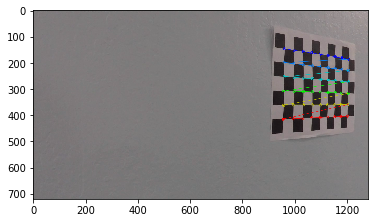

./camera_cal/calibration16.jpg


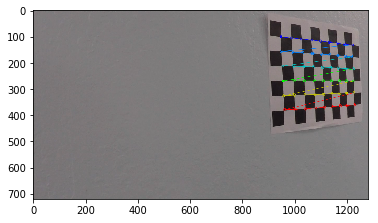

./camera_cal/calibration17.jpg


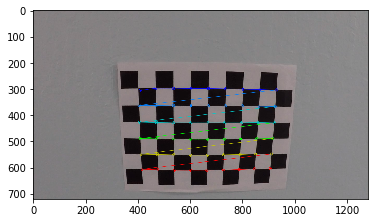

./camera_cal/calibration13.jpg


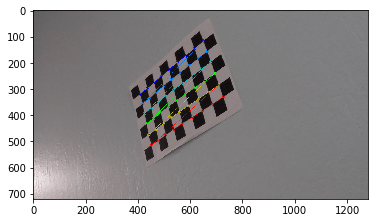

./camera_cal/calibration12.jpg


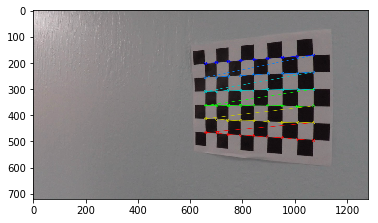

./camera_cal/calibration10.jpg


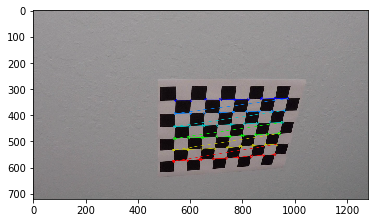

./camera_cal/calibration11.jpg


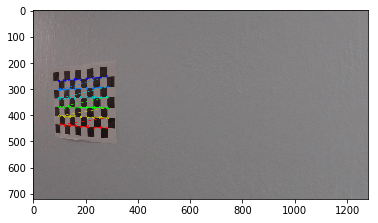

./camera_cal/calibration9.jpg


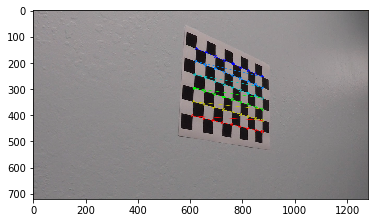

./camera_cal/calibration8.jpg


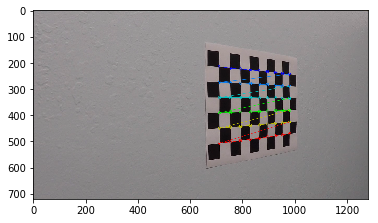

dict_keys([2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])


In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


from ipywidgets import interact, interactive, fixed
from moviepy.editor import VideoFileClip
from IPython.display import HTML

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('./camera_cal/calibration*.jpg')

imgs={}

# Step through the list and search for chessboard corners
for i,fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    imgsIn=[]



    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)
        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (9,6), corners, ret)

        print(fname)
        plt.imshow(img)
        imgsIn.append(img)
        imgsIn.append(objp)
        imgsIn.append(corners)
   
        imgs[i]=imgsIn
        
        plt.show()
        

        
                
print(imgs.keys())




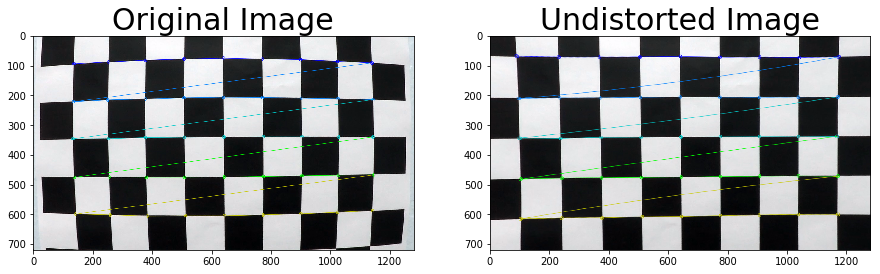

In [2]:
readImg2 = glob.glob('./camera_cal/calibration1.jpg')
unDistImg = cv2.imread('./camera_cal/calibration1.jpg')

def cal_undistort(img,objponts):
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret,corners = cv2.findChessboardCorners(gray,(9,5),None)#here 9,5 is used because only 9,5 are visiable

    img=cv2.drawChessboardCorners(img,(9,5),corners,ret)

    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img.shape[1::-1],None,None)
    dst = cv2.undistort(img, mtx, dist, None, mtx)

    
    return dst,mtx,dist

undist,mtx,dist = cal_undistort(unDistImg, objpoints)

# Visualize undistortion
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))
ax1.imshow(unDistImg)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(undist)
ax2.set_title('Undistorted Image', fontsize=30)
plt.show()

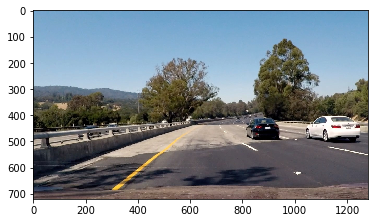

In [278]:
exampleImg=mpimg.imread('./test_images/test4.jpg')
plt.imshow(exampleImg)
plt.show()

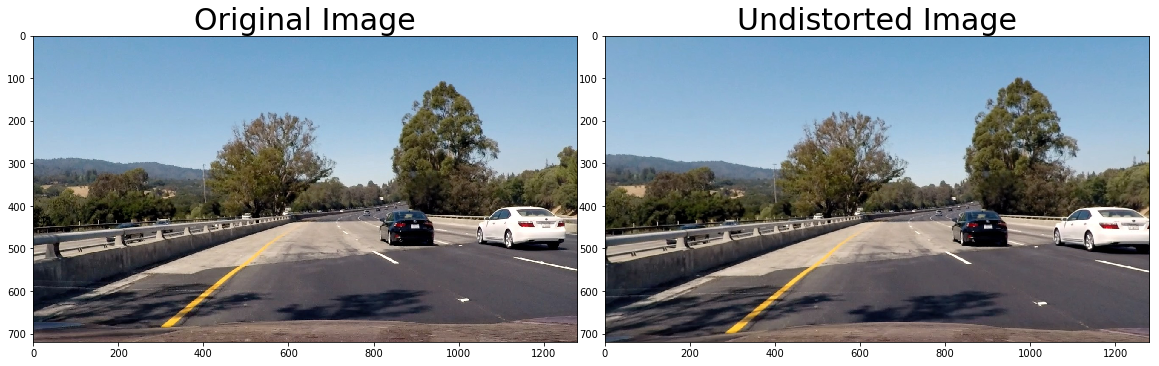

In [279]:
def undistort(img,mtx=mtx, dist=dist):

    undist = cv2.undistort(img, mtx, dist, None, mtx)
    return undist

exampleImg_undistort = undistort(exampleImg)

# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
f.subplots_adjust(hspace = .2, wspace=.05)
ax1.imshow(exampleImg)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(exampleImg_undistort)
ax2.set_title('Undistorted Image', fontsize=30)
plt.show()

In [280]:
def unWarpedImg(img,src,dst):
    M = cv2.getPerspectiveTransform(src, dst)
    img_size = (img.shape[1], img.shape[0])
    Minv = cv2.getPerspectiveTransform(dst, src)

    warped=cv2.warpPerspective(img,M,img_size,flags=cv2.INTER_LINEAR)
    return warped,M,Minv







[560.0, 300.0, 1185.0, 688.0, 560.0]
[455.0, 682.0, 682.0, 455.0, 455.0]


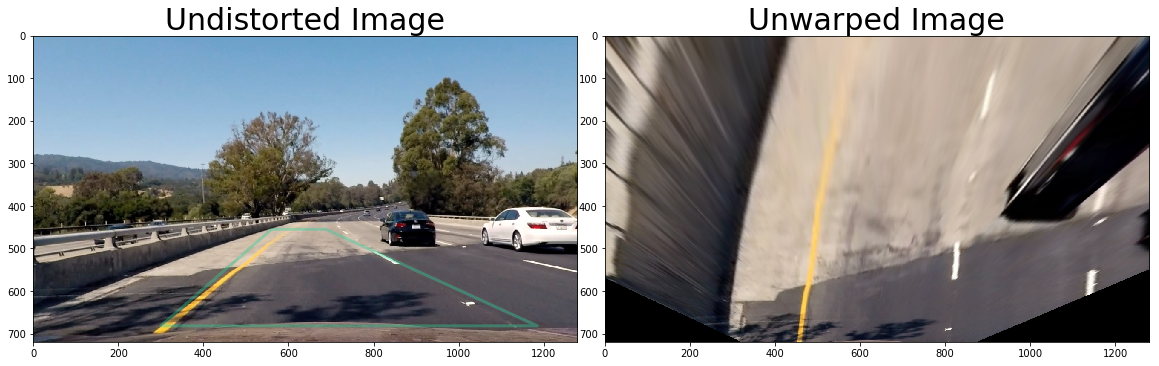

In [281]:
src = np.float32([(560,455),
                  (688,455), 
                  (300,682), 
                  (1185,682)])
dst = np.float32([(450,0),
                  (830,0),
                  (450,720),
                  (830,720)])


exampleImg_unwarp, M, Minv = unWarpedImg(exampleImg_undistort, src, dst)

# Visualize unwarp
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
f.subplots_adjust(hspace = .2, wspace=.05)
ax1.imshow(exampleImg_undistort)
x = [src[0][0],src[2][0],src[3][0],src[1][0],src[0][0]]
print(x)
y = [src[0][1],src[2][1],src[3][1],src[1][1],src[0][1]]
print(y)
ax1.plot(x, y, color='#33cc99', alpha=0.4, linewidth=3, solid_capstyle='round', zorder=2)

ax1.set_title('Undistorted Image', fontsize=30)
ax2.imshow(exampleImg_unwarp)
ax2.set_title('Unwarped Image', fontsize=30)
plt.show()


In [282]:
# src1 = np.float32([(430,300),
#                   (850,300),
#                   (430,720),
#                   (830,720)])
# dst1 = np.float32([(450,0),
#                   (830,0),
#                   (450,720),
#                   (830,720)])


# exampleImg_unwarp, M, Minv = unWarpedImg(exampleImg_unwarp1, src1, dst1)

# # Visualize unwarp
# f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
# f.subplots_adjust(hspace = .2, wspace=.05)
# ax1.imshow(exampleImg_unwarp1)
# x = [src1[0][0],src1[2][0],src1[3][0],src1[1][0],src1[0][0]]
# print(x)
# y = [src1[0][1],src1[2][1],src1[3][1],src1[1][1],src1[0][1]]
# print(y)
# ax1.plot(x, y, color='#33cc99', alpha=0.4, linewidth=3, solid_capstyle='round', zorder=2)

# ax1.set_title('Undistorted Image', fontsize=30)
# ax2.imshow(exampleImg_unwarp)
# ax2.set_title('Unwarped Image', fontsize=30)
# plt.show()

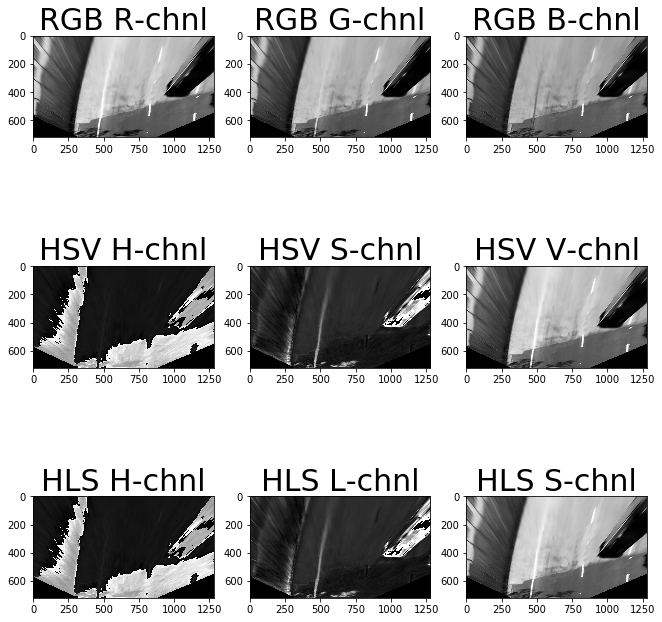

In [283]:
exampleImg_unwarp_R = exampleImg_unwarp[:,:,0]
exampleImg_unwarp_G = exampleImg_unwarp[:,:,1]
exampleImg_unwarp_B = exampleImg_unwarp[:,:,2]

exampleImg_unwarp_HSV = cv2.cvtColor(exampleImg_unwarp, cv2.COLOR_RGB2HSV)
exampleImg_unwarp_H = exampleImg_unwarp_HSV[:,:,0]
exampleImg_unwarp_S = exampleImg_unwarp_HSV[:,:,1]
exampleImg_unwarp_V = exampleImg_unwarp_HSV[:,:,2]

exampleImg_unwarp_HLS = cv2.cvtColor(exampleImg_unwarp, cv2.COLOR_RGB2HLS)
exampleImg_unwarp_h = exampleImg_unwarp_HSV[:,:,0]
exampleImg_unwarp_l = exampleImg_unwarp_HSV[:,:,1]
exampleImg_unwarp_s = exampleImg_unwarp_HSV[:,:,2]

# fig,axs=plt.subplot(1,0,figsize=(11,11))
# axs=axs.ravel()
fig, axs = plt.subplots(3,3, figsize=(11, 12))
# fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
axs[0].imshow(exampleImg_unwarp_R, cmap='gray')
axs[0].set_title('RGB R-chnl', fontsize=30)
axs[1].imshow(exampleImg_unwarp_G, cmap='gray')
axs[1].set_title('RGB G-chnl', fontsize=30)
axs[2].imshow(exampleImg_unwarp_B, cmap='gray')
axs[2].set_title('RGB B-chnl', fontsize=30)

axs[3].imshow(exampleImg_unwarp_H, cmap='gray')
axs[3].set_title('HSV H-chnl', fontsize=30)
axs[4].imshow(exampleImg_unwarp_S, cmap='gray')
axs[4].set_title('HSV S-chnl', fontsize=30)
axs[5].imshow(exampleImg_unwarp_V, cmap='gray')
axs[5].set_title('HSV V-chnl', fontsize=30)

axs[6].imshow(exampleImg_unwarp_h, cmap='gray')
axs[6].set_title('HLS H-chnl', fontsize=30)
axs[7].imshow(exampleImg_unwarp_l, cmap='gray')
axs[7].set_title('HLS L-chnl', fontsize=30)
axs[8].imshow(exampleImg_unwarp_s, cmap='gray')
axs[8].set_title('HLS S-chnl', fontsize=30)

plt.show()




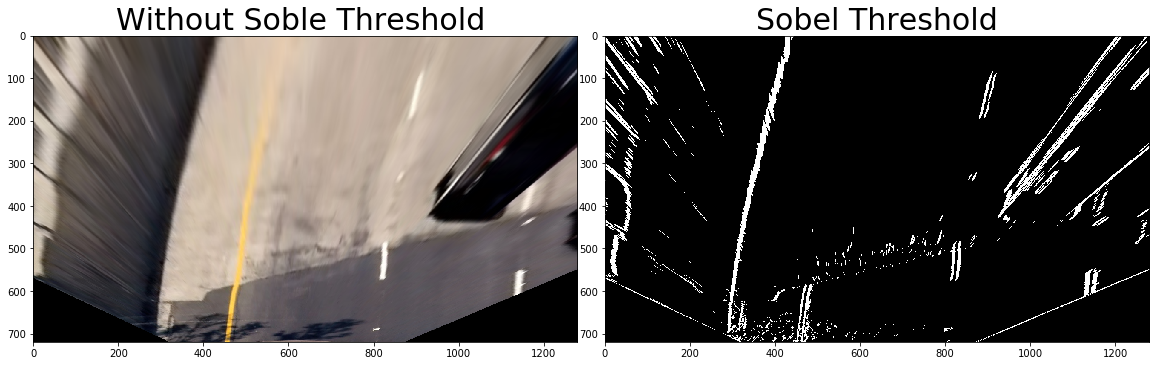

In [284]:
def abs_sobel_threshold(img,orient='x',thresh_min=0,thresh_max=255):
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    if orient=='x':
        abs_sobel = np.absolute(cv2.Sobel(gray,cv2.CV_64F,1,0))
    if orient=='y':
        abs_sobel = np.absolute(cv2.Sobel(gray,cv2.CV_64F,0,1))
    scaled_sobel=np.uint8(255*abs_sobel/np.max(abs_sobel))
    binary_output=np.zeros_like(scaled_sobel)
    binary_output[(scaled_sobel>=thresh_min) & (scaled_sobel<=thresh_max) ]=1
    return binary_output

sobelOperaterImg=abs_sobel_threshold(exampleImg_unwarp,orient='x',thresh_min=20,thresh_max=200)
# sobelOperaterImg=abs_sobel_threshold(exampleImg_unwarp,orient='y',thresh_min=5,thresh_max=25)



f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
f.subplots_adjust(hspace = .2, wspace=.05)
ax1.imshow(exampleImg_unwarp,cmap='gray')
ax1.set_title('Without Soble Threshold ', fontsize=30)
ax2.imshow(sobelOperaterImg,cmap='gray')
ax2.set_title('Sobel Threshold', fontsize=30)
plt.show()



In [296]:
def mag_thresh(img,sobel_kernel=3,mag_thresh=(0,255),greyBool=True):
    if(greyBool):
        gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
        sobelx = cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=sobel_kernel)
        sobely = cv2.Sobel(gray,cv2.CV_64F,0,1,ksize=sobel_kernel)
    else:
        sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=sobel_kernel)
        sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=sobel_kernel) 
    
    gradmag=np.sqrt(sobelx**2,sobely**2)
    scale_factor=np.max(gradmag)/255
    
    gradmag = (gradmag/scale_factor).astype(np.uint8)
    
    binary_output = np.zeros_like(gradmag)
    binary_output[(gradmag>=mag_thresh[0])&(gradmag<=mag_thresh[1])]=1
    
    return binary_output


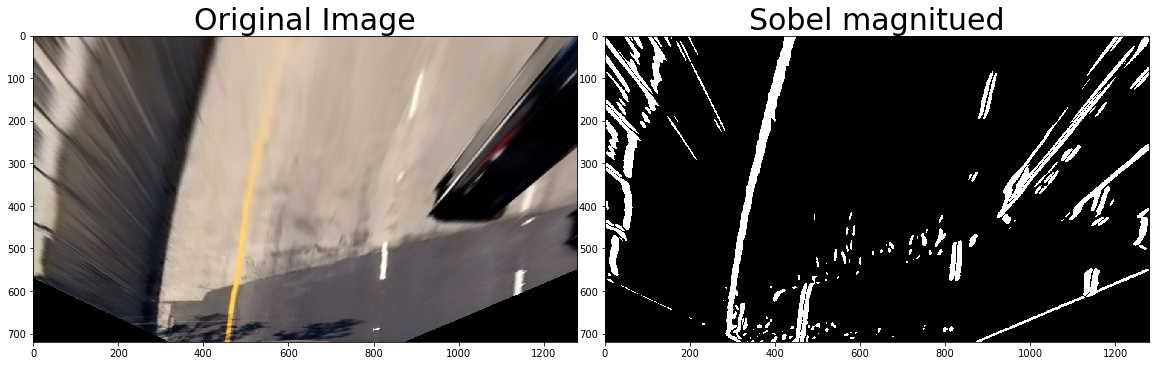

In [297]:
mag_thresh_val=mag_thresh(exampleImg_unwarp,sobel_kernel=31, mag_thresh=(30, 255))

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
f.subplots_adjust(hspace = .2, wspace=.05)
ax1.imshow(exampleImg_unwarp,cmap='gray')
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(mag_thresh_val,cmap='gray')
ax2.set_title('Sobel magnitued', fontsize=30)
plt.show()


In [298]:
def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    # Grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Calculate the x and y gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Take the absolute value of the gradient direction, 
    # apply a threshold, and create a binary image result
    absgraddir = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
    absgraddir = np.absolute(absgraddir)

    binary_output =  np.zeros_like(absgraddir)
    binary_output[(absgraddir >= thresh[0]) & (absgraddir <= thresh[1])] = 1

    # Return the binary image
    return binary_output

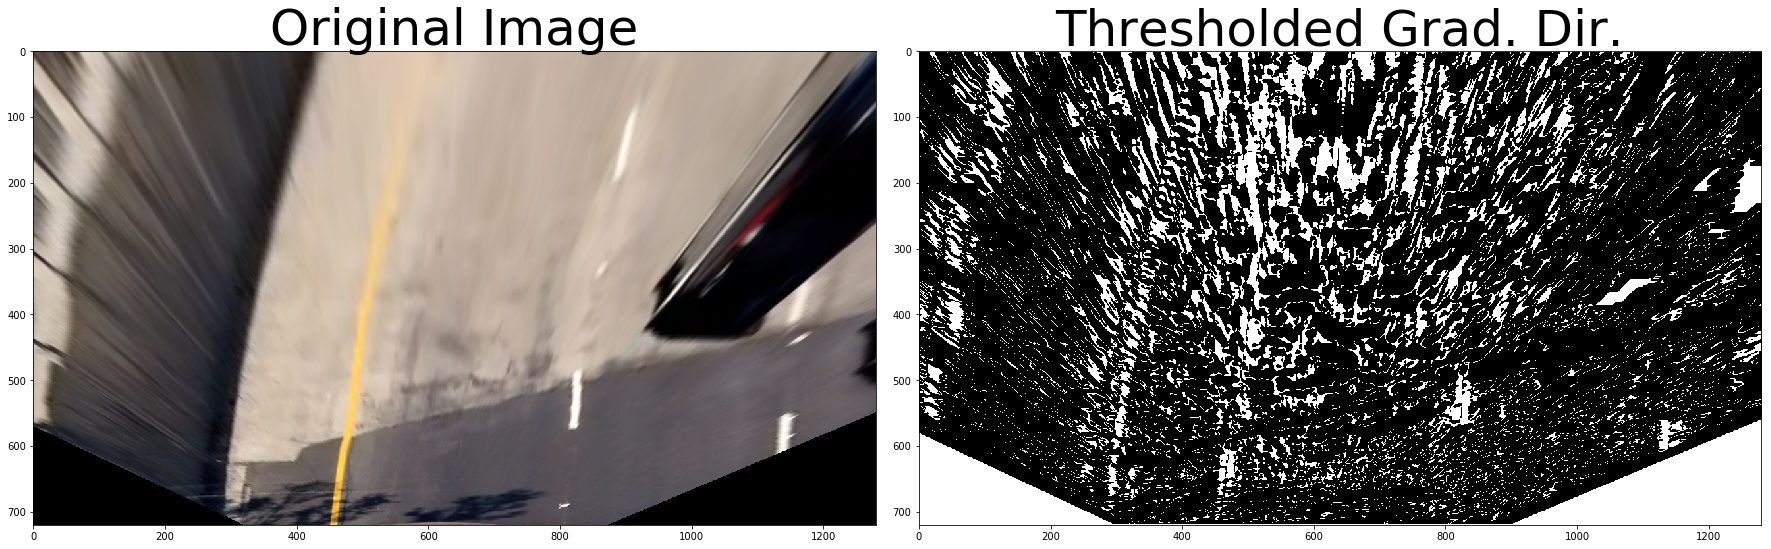

In [299]:
# dir_binary = dir_threshold(exampleImg_unwarp, sobel_kernel=15, thresh=((np.pi)/40,(np.pi)/1.5))
dir_binary = dir_threshold(exampleImg_unwarp, sobel_kernel=15, thresh=(-5, .21))


# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(exampleImg_unwarp)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(dir_binary, cmap='gray')
ax2.set_title('Thresholded Grad. Dir.', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()


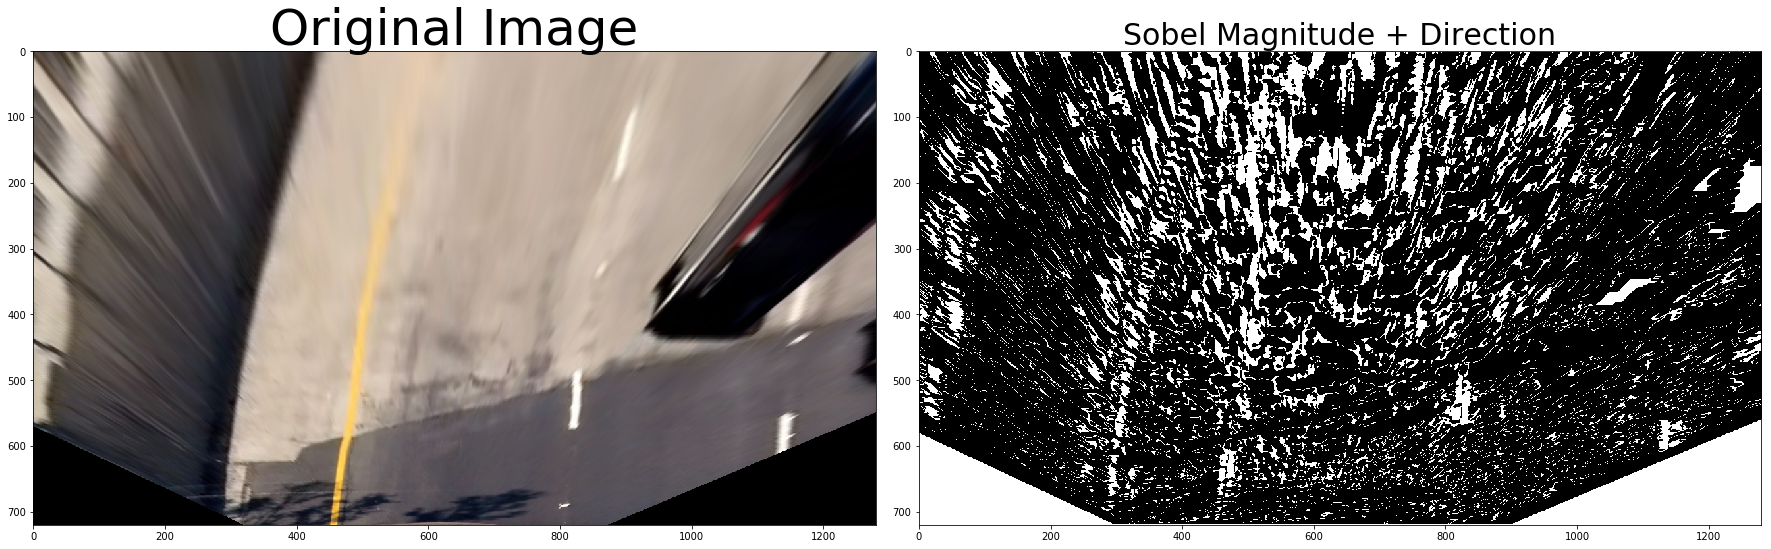

In [300]:
def comb(exampleImg_unwarp,greyBool=True):
    exampleImg_sobelMag=mag_thresh(exampleImg_unwarp,sobel_kernel=3, mag_thresh=(30, 100),greyBool=greyBool)
    exampleImg_sobelDir= dir_threshold(exampleImg_unwarp, sobel_kernel=15, thresh=(-8, .1))
    sobelAbsoluteImgx=abs_sobel_threshold(exampleImg_unwarp,orient='x',thresh_min=20,thresh_max=200)
    sobelAbsoluteImgy=abs_sobel_threshold(exampleImg_unwarp,orient='y',thresh_min=5,thresh_max=200)



    combined = np.zeros_like(exampleImg_sobelMag)
    combined[((exampleImg_sobelMag == 1) & (exampleImg_sobelDir == 1)) | ((sobelAbsoluteImgx == 1) & (sobelAbsoluteImgy == 1))] = 1
    return combined
    # Visualize sobel magnitude + direction threshold

comb(exampleImg_unwarp,greyBool=True)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(exampleImg_unwarp)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(dir_binary, cmap='gray')
ax2.set_title('Sobel Magnitude + Direction', fontsize=30)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()

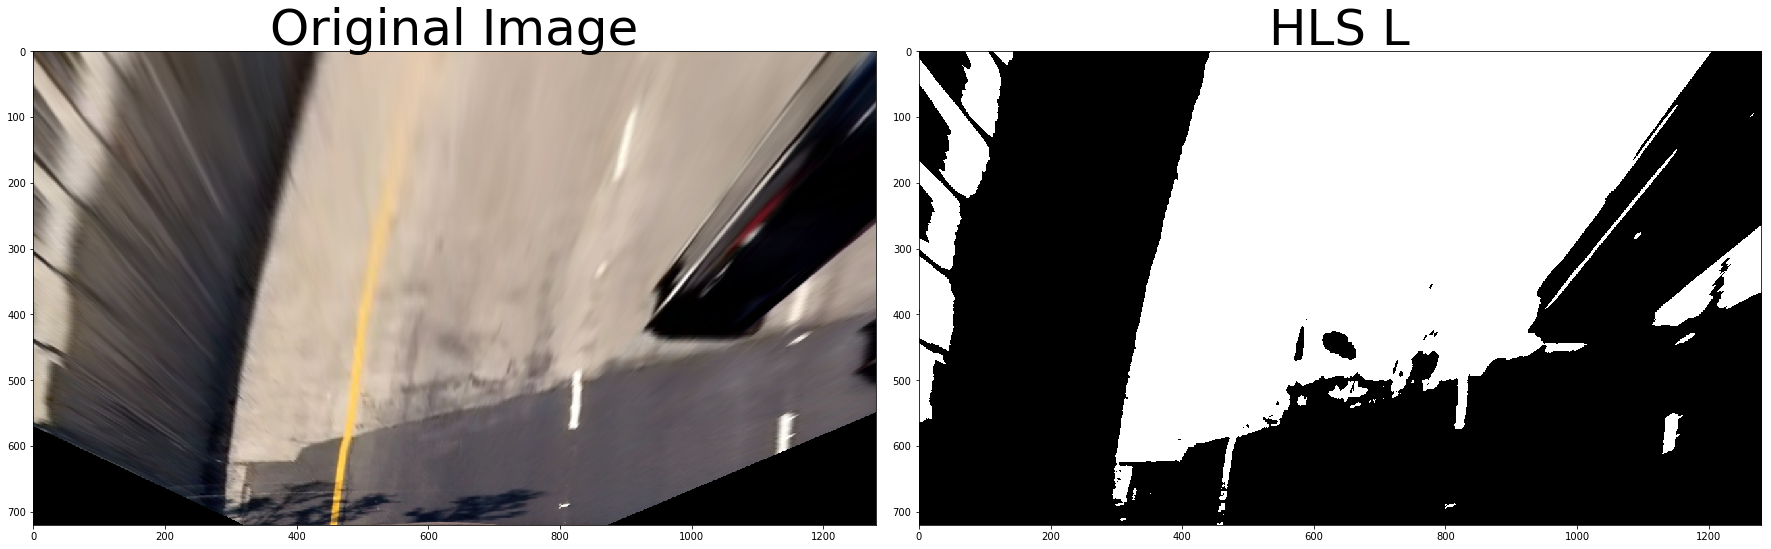

In [301]:

def hls_selectL(img, thresh=(0, 255)):
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    hls_l = hls[:,:,1]
    l_channel = hls_l*(255/np.max(hls_l))


    binary_output = np.zeros_like(l_channel)
    binary_output[(l_channel > thresh[0]) & (l_channel <= thresh[1])] = 1
    return binary_output
    
    
hls_binary = hls_selectL(exampleImg_unwarp, thresh=(150, 255))
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(exampleImg_unwarp)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(hls_binary, cmap='gray')
ax2.set_title('HLS L', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()

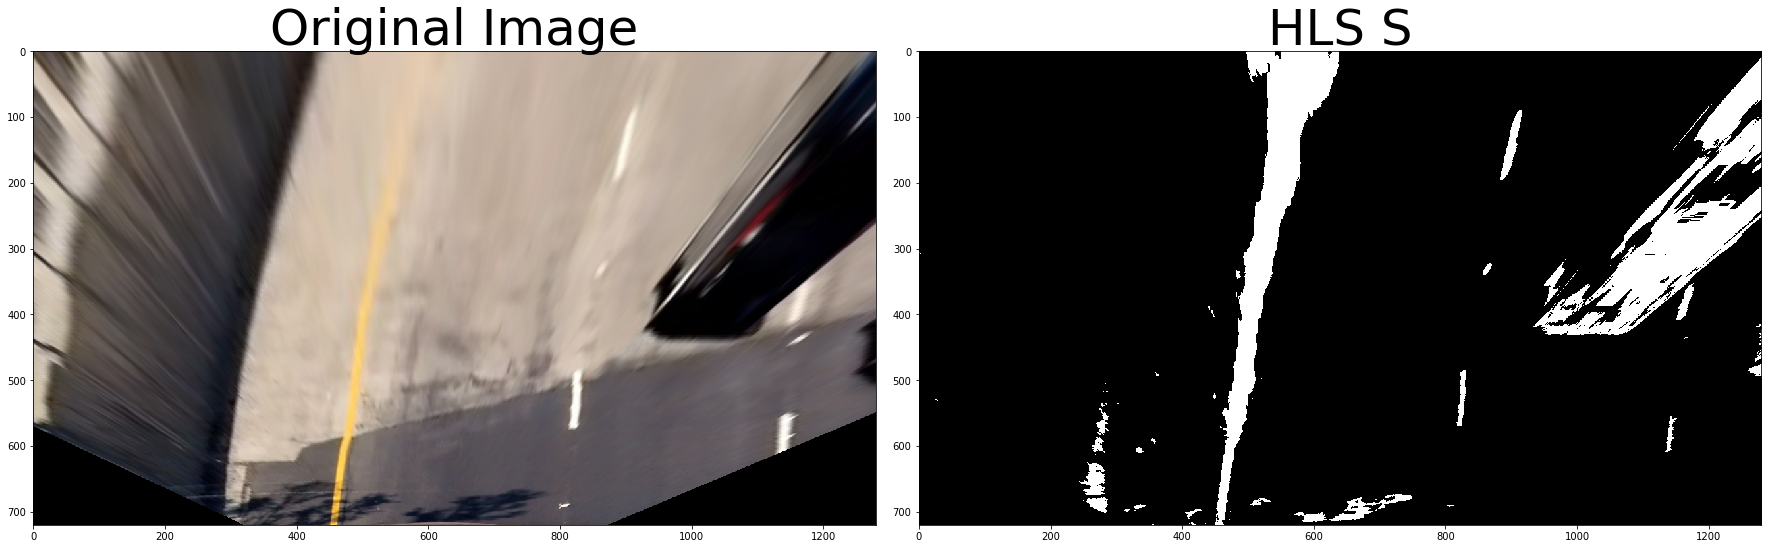

In [304]:
def hls_selectS(img, thresh=(0, 255)):
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    hls_l = hls[:,:,2]
    l_channel = hls_l*(255/np.max(hls_l))


    binary_output = np.zeros_like(l_channel)
    binary_output[(l_channel > thresh[0]) & (l_channel <= thresh[1])] = 1
    return binary_output
    
    
hls_binary = hls_selectS(exampleImg_unwarp, thresh=(90, 255))
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(exampleImg_unwarp)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(hls_binary, cmap='gray')
ax2.set_title('HLS S', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()

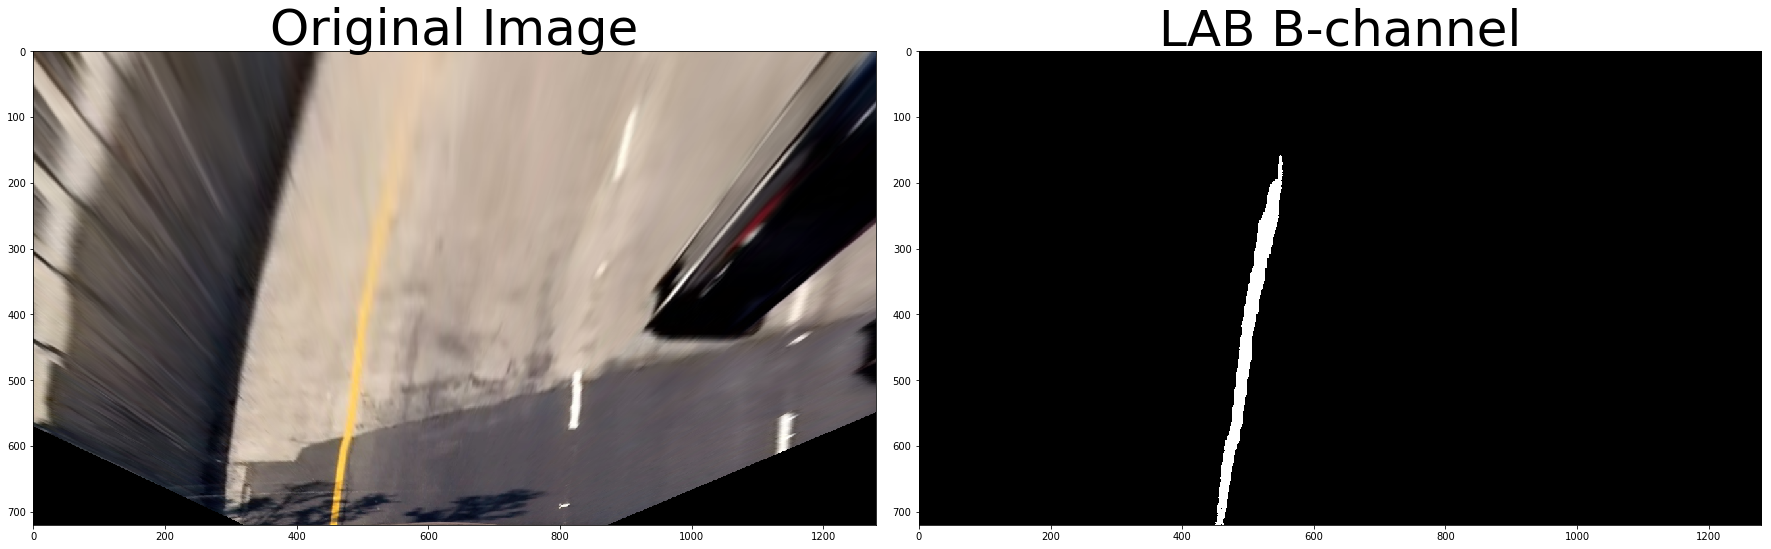

In [303]:
def lab_bthresh(img, thresh=(0,255)):
    # 1) Convert to LAB color space
    lab = cv2.cvtColor(img, cv2.COLOR_RGB2Lab)
    lab_b = lab[:,:,2]
    # don't normalize if there are no yellows in the image
    if np.max(lab_b) > 175:
        lab_b = lab_b*(255/np.max(lab_b))
    # 2) Apply a threshold to the L channel
    binary_output = np.zeros_like(lab_b)
    binary_output[((lab_b > thresh[0]) & (lab_b <= thresh[1]))] = 1
    # 3) Return a binary image of threshold result
    return binary_output

    
LBThresh_img = lab_bthresh(exampleImg_unwarp,thresh=(190,250))

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(exampleImg_unwarp)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(LBThresh_img, cmap='gray')
ax2.set_title('LAB B-channel', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()


In [173]:
# def update(min_b_thresh, max_b_thresh):
#     exampleImg_LBThresh = lab_bthresh(exampleImg_unwarp, (min_b_thresh, max_b_thresh))
#     # Visualize LAB B threshold
#     f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
#     f.subplots_adjust(hspace = .2, wspace=.05)
#     ax1.imshow(exampleImg_unwarp)
#     ax1.set_title('Unwarped Image', fontsize=30)
#     ax2.imshow(exampleImg_LBThresh, cmap='gray')
#     ax2.set_title('LAB B-channel', fontsize=30)

# interact(update,
#          min_b_thresh=(0,255),
#          max_b_thresh=(0,255))



In [356]:
def pipeline(img):
    img = np.copy(img)
    img_undistort = undistort(img)
    img_unwarp, M, Minv = unWarpedImg(img_undistort, src, dst)

#     img_unwarp, M1, Minv1 = unWarpedImg(img_unwarp1, src1, dst1)

    exampleImg_unwarp_R = img_unwarp[:,:,0]


    # Convert to HLS color space and separate the V channel
    sobelOperaterImg=abs_sobel_threshold(img_unwarp,orient='x',thresh_min=20,thresh_max=100)    
    print(sobelOperaterImg.shape)
    # Threshold color channel
#     hls_binary = hls_selectS(img_unwarp, thresh=(90, 255))
    hls_select_L = hls_selectL(img_unwarp, thresh=(125, 255))
#     hls_selectL(img_unwarp, thresh=(80, 255))

    dir_binary = dir_threshold(img_unwarp, sobel_kernel=15, thresh=(-5, .21))

    LBThresh_img =  lab_bthresh(img_unwarp,thresh=(200,250))
    
#     lab_bthresh(img_unwarp,thresh=(190,250))
    
    mag_thresh_val=mag_thresh(img_unwarp,sobel_kernel=15, mag_thresh=(30, 255))

    sobelOperaterImg=abs_sobel_threshold(exampleImg_unwarp,orient='x',thresh_min=20,thresh_max=200)



    hls_binary_s = hls_selectS(img_unwarp, thresh=(90, 255))


    # Stack each channel
    # Note color_binary[:, :, 0] is all 0s, effectively an all black image. It might
    # be beneficial to replace this channel with something else.
#     color_binary = np.dstack(( np.zeros_like(LBThresh_img))) 
    combined = np.zeros_like(LBThresh_img)
    combined[( ((hls_binary_s == 1)  & (hls_select_L==1) ) | (LBThresh_img==1))==1] = 1
    
    return combined,Minv

['./test_images/test6.jpg', './test_images/test5.jpg', './test_images/test4.jpg', './test_images/test1.jpg', './test_images/test3.jpg', './test_images/test2.jpg', './test_images/straight_lines2.jpg', './test_images/straight_lines1.jpg']
./test_images/test6.jpg
(720, 1280)
./test_images/test5.jpg
(720, 1280)
./test_images/test4.jpg
(720, 1280)
./test_images/test1.jpg
(720, 1280)
./test_images/test3.jpg
(720, 1280)
./test_images/test2.jpg
(720, 1280)
./test_images/straight_lines2.jpg
(720, 1280)
./test_images/straight_lines1.jpg
(720, 1280)


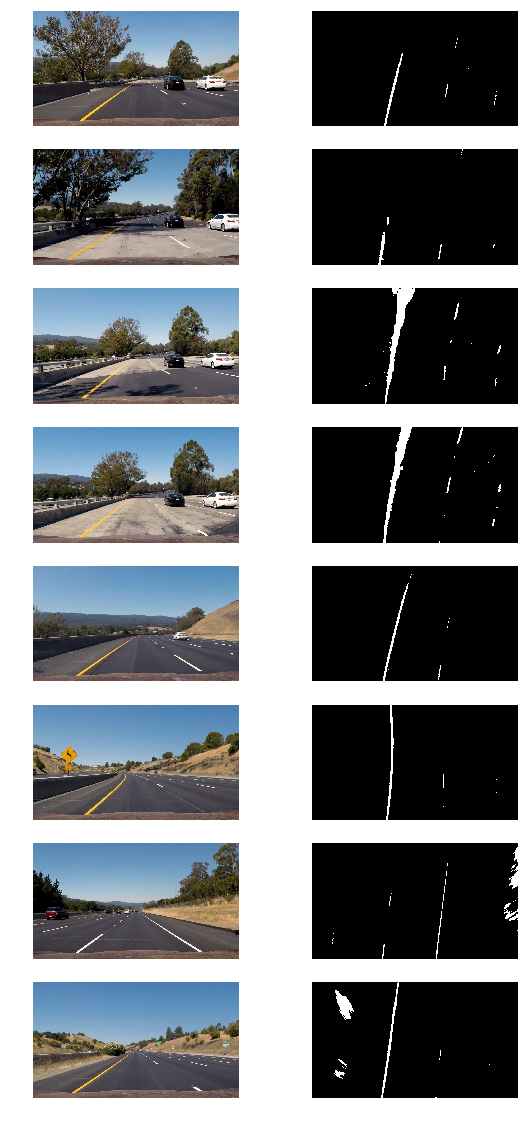

In [357]:
images = glob.glob('./test_images/*.jpg')
fig, axs = plt.subplots(len(images),2, figsize=(10, 20))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
print(images)
i = 0
for image in images:
    print(image)
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_bin, Minv = pipeline(img)
    axs[i].imshow(img)
    axs[i].axis('off')
    i += 1
    axs[i].imshow(img_bin, cmap='gray')
    axs[i].axis('off')
    i += 1

plt.show()



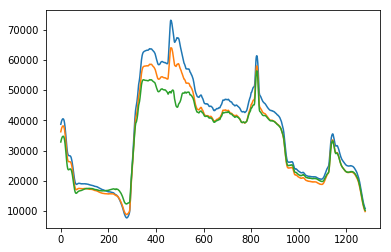

In [358]:
import numpy as np
histogram = np.sum(exampleImg_unwarp[exampleImg_unwarp1.shape[0]//2:,:], axis=0)
plt.plot(histogram)
plt.show()

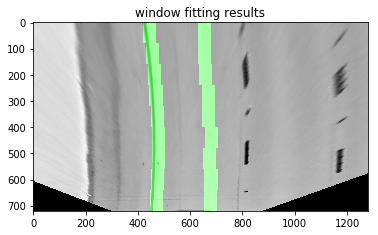

In [359]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import cv2

# Read in a thresholded image
img = exampleImg_unwarp1
warped = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)


# window settings
window_width = 50 
window_height = 80 # Break image into 9 vertical layers since image height is 720
margin = 100 # How much to slide left and right for searching

def window_mask(width, height, img_ref, center,level):
    output = np.zeros_like(img_ref)
    output[int(img_ref.shape[0]-(level+1)*height):int(img_ref.shape[0]-level*height),max(0,int(center-width/2)):min(int(center+width/2),img_ref.shape[1])] = 1
    return output

def find_window_centroids(image, window_width, window_height, margin):
    
    window_centroids = [] # Store the (left,right) window centroid positions per level
    window = np.ones(window_width) # Create our window template that we will use for convolutions
    
    # First find the two starting positions for the left and right lane by using np.sum to get the vertical image slice
    # and then np.convolve the vertical image slice with the window template 
    
    # Sum quarter bottom of image to get slice, could use a different ratio
    l_sum = np.sum(image[int(3*image.shape[0]/4):,:int(image.shape[1]/2)], axis=0)
    l_center = np.argmax(np.convolve(window,l_sum))-window_width/2
    r_sum = np.sum(image[int(3*image.shape[0]/4):,int(image.shape[1]/2):], axis=0)
    r_center = np.argmax(np.convolve(window,r_sum))-window_width/2+int(image.shape[1]/2)
    
    # Add what we found for the first layer
    window_centroids.append((l_center,r_center))
    
    # Go through each layer looking for max pixel locations
    for level in range(1,(int)(image.shape[0]/window_height)):
        # convolve the window into the vertical slice of the image
        image_layer = np.sum(image[int(image.shape[0]-(level+1)*window_height):int(image.shape[0]-level*window_height),:], axis=0)
        conv_signal = np.convolve(window, image_layer)
        # Find the best left centroid by using past left center as a reference
        # Use window_width/2 as offset because convolution signal reference is at right side of window, not center of window
        offset = window_width/2
        l_min_index = int(max(l_center+offset-margin,0))
        l_max_index = int(min(l_center+offset+margin,image.shape[1]))
        l_center = np.argmax(conv_signal[l_min_index:l_max_index])+l_min_index-offset
        # Find the best right centroid by using past right center as a reference
        r_min_index = int(max(r_center+offset-margin,0))
        r_max_index = int(min(r_center+offset+margin,image.shape[1]))
        r_center = np.argmax(conv_signal[r_min_index:r_max_index])+r_min_index-offset
	    # Add what we found for that layer
        window_centroids.append((l_center,r_center))

    return window_centroids

window_centroids = find_window_centroids(warped, window_width, window_height, margin)

# If we found any window centers
if len(window_centroids) > 0:

    # Points used to draw all the left and right windows
    l_points = np.zeros_like(warped)
    r_points = np.zeros_like(warped)

    # Go through each level and draw the windows 	
    for level in range(0,len(window_centroids)):
        # Window_mask is a function to draw window areas
	    l_mask = window_mask(window_width,window_height,warped,window_centroids[level][0],level)
	    r_mask = window_mask(window_width,window_height,warped,window_centroids[level][1],level)
	    # Add graphic points from window mask here to total pixels found 
	    l_points[(l_points == 255) | ((l_mask == 1) ) ] = 255
	    r_points[(r_points == 255) | ((r_mask == 1) ) ] = 255

    # Draw the results
    template = np.array(r_points+l_points,np.uint8) # add both left and right window pixels together
    zero_channel = np.zeros_like(template) # create a zero color channel
    template = np.array(cv2.merge((zero_channel,template,zero_channel)),np.uint8) # make window pixels green
    warpage= np.dstack((warped, warped, warped))*255 # making the original road pixels 3 color channels
    output = cv2.addWeighted(warpage, 1, template, 0.5, 0.0) # overlay the orignal road image with window results
 
# If no window centers found, just display orginal road image
else:
    output = np.array(cv2.merge((warped,warped,warped)),np.uint8)

# Display the final results
plt.imshow(output)
plt.title('window fitting results')
plt.show()


In [360]:
# Define method to fit polynomial to binary image with lines extracted, using sliding window
def sliding_window_polyfit(img)
    out_img = np.uint8(np.dstack((exampleImg_bin, exampleImg_bin, exampleImg_bin))*255)


    # Take a histogram of the bottom half of the image
    histogram = np.sum(img[img.shape[0]//2:,:], axis=0)
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]//2)
    quarter_point = np.int(midpoint//2)
    # Previously the left/right base was the max of the left/right half of the histogram
    # this changes it so that only a quarter of the histogram (directly to the left/right) is considered
    leftx_base = np.argmax(histogram[quarter_point:midpoint]) + quarter_point
    rightx_base = np.argmax(histogram[midpoint:(midpoint+quarter_point)]) + midpoint
    
    print('base pts:', leftx_base, rightx_base)

    # Choose the number of sliding windows
    nwindows = 10
    # Set height of windows
    window_height = np.int(img.shape[0]/nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = img.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated for each window
    leftx_current = leftx_base
    rightx_current = rightx_base
    # Set the width of the windows +/- margin
    margin = 80
    # Set minimum number of pixels found to recenter window
    minpix = 40
    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []
    # Rectangle data for visualization
    rectangle_data = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = img.shape[0] - (window+1)*window_height
        win_y_high = img.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
#         rectangle_data.append((win_y_low, win_y_high, win_xleft_low, win_xleft_high, win_xright_low, win_xright_high))
        # Identify the nonzero pixels in x and y within the window
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),(0,255,0), 2) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),(0,255,0), 2)
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0]
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds] 

    left_fit, right_fit = (None, None)
    # Fit a second order polynomial to each
    if len(leftx) != 0:
        left_fit = np.polyfit(lefty, leftx, 2)
    if len(rightx) != 0:
        right_fit = np.polyfit(righty, rightx, 2)
    
    visualization_data = (rectangle_data, histogram)
    
    return left_fit, right_fit, left_lane_inds, right_lane_inds, visualization_data


In [361]:
# # Create an image to draw on and an image to show the selection window
# out_img = np.dstack((exampleImg_bin, exampleImg_bin, exampleImg_bin))*255
# window_img = np.zeros_like(out_img)
# # Color in left and right line pixels
# out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
# out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

# # Generate a polygon to illustrate the search window area
# # And recast the x and y points into usable format for cv2.fillPoly()
# left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
# left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, 
#                               ploty])))])
# left_line_pts = np.hstack((left_line_window1, left_line_window2))
# right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
# right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, 
#                               ploty])))])
# right_line_pts = np.hstack((right_line_window1, right_line_window2))

# # Draw the lane onto the warped blank image
# cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
# cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
# result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)
# plt.imshow(result)
# plt.plot(left_fitx, ploty, color='yellow')
# plt.plot(right_fitx, ploty, color='RED')
# plt.xlim(0, 1280)
# plt.ylim(720, 0)
# plt.show()

(720, 1280)
base pts: 488 817


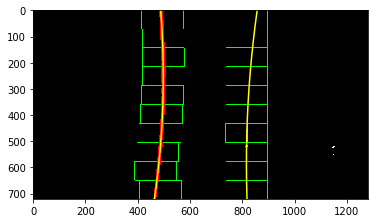

In [362]:
exampleImg = cv2.imread('./test_images/test2.jpg')
exampleImg = cv2.cvtColor(exampleImg, cv2.COLOR_BGR2RGB)
exampleImg_bin, Minv = pipeline(exampleImg)
    
left_fit, right_fit, left_lane_inds, right_lane_inds, visualization_data = sliding_window_polyfit(exampleImg_bin)

h = exampleImg.shape[0]
left_fit_x_int = left_fit[0]*h**2 + left_fit[1]*h + left_fit[2]
right_fit_x_int = right_fit[0]*h**2 + right_fit[1]*h + right_fit[2]
#print('fit x-intercepts:', left_fit_x_int, right_fit_x_int)

rectangles = visualization_data[0]
histogram = visualization_data[1]

# Create an output image to draw on and  visualize the result
out_img = np.uint8(np.dstack((exampleImg_bin, exampleImg_bin, exampleImg_bin))*255)
# Generate x and y values for plotting
ploty = np.linspace(0, exampleImg_bin.shape[0]-1, exampleImg_bin.shape[0] )
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
for rect in rectangles:
# Draw the windows on the visualization image
    cv2.rectangle(out_img,(rect[2],rect[0]),(rect[3],rect[1]),(0,255,0), 2) 
    cv2.rectangle(out_img,(rect[4],rect[0]),(rect[5],rect[1]),(0,255,0), 2) 
# Identify the x and y positions of all nonzero pixels in the image
nonzero = exampleImg_bin.nonzero()
nonzeroy = np.array(nonzero[0])
nonzerox = np.array(nonzero[1])
out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [100, 200, 255]
plt.imshow(out_img)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)
plt.show()


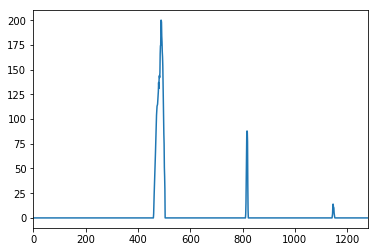

In [363]:
plt.plot(histogram)
plt.xlim(0, 1280)
plt.show()


In [364]:
def polyfit_using_prev_fit(binary_warped, left_fit_prev, right_fit_prev):
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    margin = 80
    left_lane_inds = ((nonzerox > (left_fit_prev[0]*(nonzeroy**2) + left_fit_prev[1]*nonzeroy + left_fit_prev[2] - margin)) & 
                      (nonzerox < (left_fit_prev[0]*(nonzeroy**2) + left_fit_prev[1]*nonzeroy + left_fit_prev[2] + margin))) 
    right_lane_inds = ((nonzerox > (right_fit_prev[0]*(nonzeroy**2) + right_fit_prev[1]*nonzeroy + right_fit_prev[2] - margin)) & 
                       (nonzerox < (right_fit_prev[0]*(nonzeroy**2) + right_fit_prev[1]*nonzeroy + right_fit_prev[2] + margin)))  

    # Again, extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]
    
    left_fit_new, right_fit_new = (None, None)
    if len(leftx) != 0:
        # Fit a second order polynomial to each
        left_fit_new = np.polyfit(lefty, leftx, 2)
    if len(rightx) != 0:
        right_fit_new = np.polyfit(righty, rightx, 2)
    return left_fit_new, right_fit_new, left_lane_inds, right_lane_inds


(720, 1280)


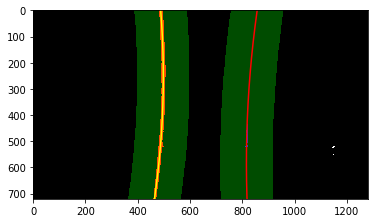

In [365]:
# visualize the result on example image
exampleImg2 = cv2.imread('./test_images/test2.jpg')
exampleImg2 = cv2.cvtColor(exampleImg2, cv2.COLOR_BGR2RGB)
exampleImg2_bin, Minv = pipeline(exampleImg2)   
margin = 100

left_fit2, right_fit2, left_lane_inds2, right_lane_inds2 = polyfit_using_prev_fit(exampleImg2_bin, left_fit, right_fit)

# Generate x and y values for plotting
ploty = np.linspace(0, exampleImg2_bin.shape[0]-1, exampleImg2_bin.shape[0] )
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
left_fitx2 = left_fit2[0]*ploty**2 + left_fit2[1]*ploty + left_fit2[2]
right_fitx2 = right_fit2[0]*ploty**2 + right_fit2[1]*ploty + right_fit2[2]

# Create an image to draw on and an image to show the selection window
out_img = np.uint8(np.dstack((exampleImg2_bin, exampleImg2_bin, exampleImg2_bin))*255)
window_img = np.zeros_like(out_img)

# Color in left and right line pixels
nonzero = exampleImg2_bin.nonzero()
nonzeroy = np.array(nonzero[0])
nonzerox = np.array(nonzero[1])
out_img[nonzeroy[left_lane_inds2], nonzerox[left_lane_inds2]] = [255, 0, 0]
out_img[nonzeroy[right_lane_inds2], nonzerox[right_lane_inds2]] = [0, 0, 255]

# Generate a polygon to illustrate the search window area (OLD FIT)
# And recast the x and y points into usable format for cv2.fillPoly()
left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, ploty])))])
left_line_pts = np.hstack((left_line_window1, left_line_window2))
right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, ploty])))])
right_line_pts = np.hstack((right_line_window1, right_line_window2))

# Draw the lane onto the warped blank image
cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)
plt.imshow(result)
plt.plot(left_fitx2, ploty, color='yellow')
plt.plot(right_fitx2, ploty, color='RED')
plt.xlim(0, 1280)
plt.ylim(720, 0)
plt.show()


In [366]:
def calc_curv_rad_and_center_dist(bin_img, l_fit, r_fit, l_lane_inds, r_lane_inds):
    # Define conversions in x and y from pixels space to meters
    ym_per_pix = 3.048/100 # meters per pixel in y dimension, lane line is 10 ft = 3.048 meters
    xm_per_pix = 3.7/378 # meters per pixel in x dimension, lane width is 12 ft = 3.7 meters
    left_curverad, right_curverad, center_dist = (0, 0, 0)
    # Define y-value where we want radius of curvature
    # I'll choose the maximum y-value, corresponding to the bottom of the image
    h = bin_img.shape[0]
    ploty = np.linspace(0, h-1, h)
    y_eval = np.max(ploty)
  
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = bin_img.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Again, extract left and right line pixel positions
    leftx = nonzerox[l_lane_inds]
    lefty = nonzeroy[l_lane_inds] 
    rightx = nonzerox[r_lane_inds]
    righty = nonzeroy[r_lane_inds]
    
    if len(leftx) != 0 and len(rightx) != 0:
        # Fit new polynomials to x,y in world space
        left_fit_cr = np.polyfit(lefty*ym_per_pix, leftx*xm_per_pix, 2)
        right_fit_cr = np.polyfit(righty*ym_per_pix, rightx*xm_per_pix, 2)
        # Calculate the new radii of curvature
        left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
        right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
        # Now our radius of curvature is in meters
    
    # Distance from center is image x midpoint - mean of l_fit and r_fit intercepts 
    if r_fit is not None and l_fit is not None:
        car_position = bin_img.shape[1]/2
        l_fit_x_int = l_fit[0]*h**2 + l_fit[1]*h + l_fit[2]
        r_fit_x_int = r_fit[0]*h**2 + r_fit[1]*h + r_fit[2]
        lane_center_position = (r_fit_x_int + l_fit_x_int) /2
        center_dist = (car_position - lane_center_position) * xm_per_pix
    return left_curverad, right_curverad, center_dist


In [367]:
rad_l, rad_r, d_center = calc_curv_rad_and_center_dist(exampleImg_bin, left_fit, right_fit, left_lane_inds, right_lane_inds)

print('Radius of curvature for example:', rad_l, 'm,', rad_r, 'm')
print('Distance from lane center for example:', d_center, 'm')

Radius of curvature for example: 305.385939459 m, 393.248370466 m
Distance from lane center for example: -0.00979308829177 m


In [368]:
def draw_lane(original_img, binary_img, l_fit, r_fit, Minv):
    new_img = np.copy(original_img)
    if l_fit is None or r_fit is None:
        return original_img
    # Create an image to draw the lines on
    warp_zero = np.zeros_like(binary_img).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))
    
    h,w = binary_img.shape
    ploty = np.linspace(0, h-1, num=h)# to cover same y-range as image
    left_fitx = l_fit[0]*ploty**2 + l_fit[1]*ploty + l_fit[2]
    right_fitx = r_fit[0]*ploty**2 + r_fit[1]*ploty + r_fit[2]

    # Recast the x and y points into usable format for cv2.fillPoly()
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))
    cv2.polylines(color_warp, np.int32([pts_left]), isClosed=False, color=(255,0,255), thickness=15)
    cv2.polylines(color_warp, np.int32([pts_right]), isClosed=False, color=(0,255,255), thickness=15)

    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    newwarp = cv2.warpPerspective(color_warp, Minv, (w, h)) 
    # Combine the result with the original image
    result = cv2.addWeighted(new_img, 1, newwarp, 0.5, 0)
    return result


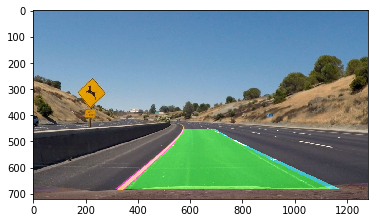

In [369]:
exampleImg_out1 = draw_lane(exampleImg, exampleImg_bin, left_fit, right_fit, Minv)
plt.imshow(exampleImg_out1)
plt.show()


In [370]:
def draw_data(original_img, curv_rad, center_dist):
    new_img = np.copy(original_img)
    h = new_img.shape[0]
    font = cv2.FONT_HERSHEY_DUPLEX
    text = 'Curve radius: ' + '{:04.2f}'.format(curv_rad) + 'm'
    cv2.putText(new_img, text, (40,70), font, 1.5, (200,255,155), 2, cv2.LINE_AA)
    direction = ''
    if center_dist > 0:
        direction = 'right'
    elif center_dist < 0:
        direction = 'left'
    abs_center_dist = abs(center_dist)
    text = '{:04.3f}'.format(abs_center_dist) + 'm ' + direction + ' of center'
    cv2.putText(new_img, text, (40,120), font, 1.5, (200,255,155), 2, cv2.LINE_AA)
    return new_img


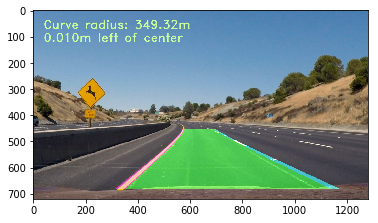

In [371]:
exampleImg_out2 = draw_data(exampleImg_out1, (rad_l+rad_r)/2, d_center)
plt.imshow(exampleImg_out2)
plt.show()


In [372]:
# Define a class to receive the characteristics of each line detection
class Line():
    def __init__(self):
        # was the line detected in the last iteration?
        self.detected = False  
        # x values of the last n fits of the line
        self.recent_xfitted = [] 
        #average x values of the fitted line over the last n iterations
        self.bestx = None     
        #polynomial coefficients averaged over the last n iterations
        self.best_fit = None  
        #polynomial coefficients for the most recent fit
        self.current_fit = []  
        #radius of curvature of the line in some units
        self.radius_of_curvature = None 
        #distance in meters of vehicle center from the line
        self.line_base_pos = None 
        #difference in fit coefficients between last and new fits
        self.diffs = np.array([0,0,0], dtype='float') 
        #number of detected pixels
        self.px_count = None
    def add_fit(self, fit, inds):
        # add a found fit to the line, up to n
        if fit is not None:
            if self.best_fit is not None:
                # if we have a best fit, see how this new fit compares
                self.diffs = abs(fit-self.best_fit)
            if (self.diffs[0] > 0.001 or \
               self.diffs[1] > 1.0 or \
               self.diffs[2] > 100.) and \
               len(self.current_fit) > 0:
                # bad fit! abort! abort! ... well, unless there are no fits in the current_fit queue, then we'll take it
                self.detected = False
            else:
                self.detected = True
                self.px_count = np.count_nonzero(inds)
                self.current_fit.append(fit)
                if len(self.current_fit) > 5:
                    # throw out old fits, keep newest n
                    self.current_fit = self.current_fit[len(self.current_fit)-5:]
                self.best_fit = np.average(self.current_fit, axis=0)
        # or remove one from the history, if not found
        else:
            self.detected = False
            if len(self.current_fit) > 0:
                # throw out oldest fit
                self.current_fit = self.current_fit[:len(self.current_fit)-1]
            if len(self.current_fit) > 0:
                # if there are still any fits in the queue, best_fit is their average
                self.best_fit = np.average(self.current_fit, axis=0)


            



In [373]:
def process_image(img):
    new_img = np.copy(img)
    img_bin, Minv = pipeline(new_img)
    
    # if both left and right lines were detected last frame, use polyfit_using_prev_fit, otherwise use sliding window
    if not l_line.detected or not r_line.detected:
        l_fit, r_fit, l_lane_inds, r_lane_inds, _ = sliding_window_polyfit(img_bin)
    else:
        l_fit, r_fit, l_lane_inds, r_lane_inds = polyfit_using_prev_fit(img_bin, l_line.best_fit, r_line.best_fit)
        
    # invalidate both fits if the difference in their x-intercepts isn't around 350 px (+/- 100 px)
    if l_fit is not None and r_fit is not None:
        # calculate x-intercept (bottom of image, x=image_height) for fits
        h = img.shape[0]
        l_fit_x_int = l_fit[0]*h**2 + l_fit[1]*h + l_fit[2]
        r_fit_x_int = r_fit[0]*h**2 + r_fit[1]*h + r_fit[2]
        x_int_diff = abs(r_fit_x_int-l_fit_x_int)
        if abs(350 - x_int_diff) > 100:
            l_fit = None
            r_fit = None
            
    l_line.add_fit(l_fit, l_lane_inds)
    r_line.add_fit(r_fit, r_lane_inds)
    
    # draw the current best fit if it exists
    if l_line.best_fit is not None and r_line.best_fit is not None:
        img_out1 = draw_lane(new_img, img_bin, l_line.best_fit, r_line.best_fit, Minv)
        rad_l, rad_r, d_center = calc_curv_rad_and_center_dist(img_bin, l_line.best_fit, r_line.best_fit, 
                                                               l_lane_inds, r_lane_inds)
        img_out = draw_data(img_out1, (rad_l+rad_r)/2, d_center)
    else:
        img_out = new_img
    
    diagnostic_output = False
    if diagnostic_output:
        # put together multi-view output
        diag_img = np.zeros((720,1280,3), dtype=np.uint8)
        
        # original output (top left)
        diag_img[0:360,0:640,:] = cv2.resize(img_out,(640,360))
        
        # binary overhead view (top right)
        img_bin = np.dstack((img_bin*255, img_bin*255, img_bin*255))
        resized_img_bin = cv2.resize(img_bin,(640,360))
        diag_img[0:360,640:1280, :] = resized_img_bin
        
        # overhead with all fits added (bottom right)
        img_bin_fit = np.copy(img_bin)
        for i, fit in enumerate(l_line.current_fit):
            img_bin_fit = plot_fit_onto_img(img_bin_fit, fit, (20*i+100,0,20*i+100))
        for i, fit in enumerate(r_line.current_fit):
            img_bin_fit = plot_fit_onto_img(img_bin_fit, fit, (0,20*i+100,20*i+100))
        img_bin_fit = plot_fit_onto_img(img_bin_fit, l_line.best_fit, (255,255,0))
        img_bin_fit = plot_fit_onto_img(img_bin_fit, r_line.best_fit, (255,255,0))
        diag_img[360:720,640:1280,:] = cv2.resize(img_bin_fit,(640,360))
        
        # diagnostic data (bottom left)
        color_ok = (200,255,155)
        color_bad = (255,155,155)
        font = cv2.FONT_HERSHEY_DUPLEX
        if l_fit is not None:
            text = 'This fit L: ' + ' {:0.6f}'.format(l_fit[0]) +' {:0.6f}'.format(l_fit[1]) +' {:0.6f}'.format(l_fit[2])
        else:
            text = 'This fit L: None'
        cv2.putText(diag_img, text, (40,380), font, .5, color_ok, 1, cv2.LINE_AA)
        if r_fit is not None:
            text = 'This fit R: ' + ' {:0.6f}'.format(r_fit[0]) +' {:0.6f}'.format(r_fit[1]) +' {:0.6f}'.format(r_fit[2])
        else:
            text = 'This fit R: None'
        cv2.putText(diag_img, text, (40,400), font, .5, color_ok, 1, cv2.LINE_AA)
        text = 'Best fit L: ' + ' {:0.6f}'.format(l_line.best_fit[0]) + ' {:0.6f}'.format(l_line.best_fit[1]) + ' {:0.6f}'.format(l_line.best_fit[2])
        cv2.putText(diag_img, text, (40,440), font, .5, color_ok, 1, cv2.LINE_AA)
        text = 'Best fit R: ' + ' {:0.6f}'.format(r_line.best_fit[0]) + ' {:0.6f}'.format(r_line.best_fit[1]) +' {:0.6f}'.format(r_line.best_fit[2])
        cv2.putText(diag_img, text, (40,460), font, .5, color_ok, 1, cv2.LINE_AA)
        text = 'Diffs L: ' + ' {:0.6f}'.format(l_line.diffs[0]) +' {:0.6f}'.format(l_line.diffs[1]) +' {:0.6f}'.format(l_line.diffs[2])
        if l_line.diffs[0] > 0.001 or l_line.diffs[1] > 1.0 or l_line.diffs[2] > 100.:diffs_color = color_bad
        else:
            diffs_color = color_ok
        cv2.putText(diag_img, text, (40,500), font, .5, diffs_color, 1, cv2.LINE_AA)
        text = 'Diffs R: ' + ' {:0.6f}'.format(r_line.diffs[0]) +' {:0.6f}'.format(r_line.diffs[1]) + ' {:0.6f}'.format(r_line.diffs[2])
        if r_line.diffs[0] > 0.001 or r_line.diffs[1] > 1.0 or r_line.diffs[2] > 100.:
            diffs_color = color_bad
        else:
            diffs_color = color_ok
        cv2.putText(diag_img, text, (40,520), font, .5, diffs_color, 1, cv2.LINE_AA)
        text = 'Good fit count L:' + str(len(l_line.current_fit))
        cv2.putText(diag_img, text, (40,560), font, .5, color_ok, 1, cv2.LINE_AA)
        text = 'Good fit count R:' + str(len(r_line.current_fit))
        cv2.putText(diag_img, text, (40,580), font, .5, color_ok, 1, cv2.LINE_AA)
        
        img_out = diag_img
    return img_out


In [374]:
def plot_fit_onto_img(img, fit, plot_color):
    if fit is None:
        return img
    new_img = np.copy(img)
    h = new_img.shape[0]
    ploty = np.linspace(0, h-1, h)
    plotx = fit[0]*ploty**2 + fit[1]*ploty + fit[2]
    pts = np.array([np.transpose(np.vstack([plotx, ploty]))])
    cv2.polylines(new_img, np.int32([pts]), isClosed=False, color=plot_color, thickness=8)
    return new_img


In [ ]:
from ipywidgets import interact, interactive, fixed
from moviepy.editor import VideoFileClip
from IPython.display import HTML

l_line = Line()
r_line = Line()
#my_clip.write_gif('test.gif', fps=12)
video_output1 = 'project_video_output.mp4'
video_input1 = VideoFileClip('project_video.mp4')#.subclip(22,26)
processed_video = video_input1.fl_image(process_image)
%time processed_video.write_videofile(video_output1, audio=False)

(720, 1280)
base pts: 489 814
[MoviePy] >>>> Building video project_video_output.mp4
[MoviePy] Writing video project_video_output.mp4


  0%|          | 0/1261 [00:00<?, ?it/s]

(720, 1280)


  0%|          | 1/1261 [00:00<11:03,  1.90it/s]

(720, 1280)


  0%|          | 2/1261 [00:01<11:45,  1.78it/s]

(720, 1280)


  0%|          | 3/1261 [00:01<12:17,  1.71it/s]

(720, 1280)


  0%|          | 4/1261 [00:02<13:04,  1.60it/s]

(720, 1280)


  0%|          | 5/1261 [00:03<13:39,  1.53it/s]

(720, 1280)


  0%|          | 6/1261 [00:03<14:02,  1.49it/s]

(720, 1280)


  1%|          | 7/1261 [00:04<14:30,  1.44it/s]

(720, 1280)


  1%|          | 8/1261 [00:05<14:50,  1.41it/s]

(720, 1280)


  1%|          | 9/1261 [00:06<15:03,  1.39it/s]

(720, 1280)


  1%|          | 10/1261 [00:06<15:01,  1.39it/s]

(720, 1280)


  1%|          | 11/1261 [00:07<15:01,  1.39it/s]

(720, 1280)


  1%|          | 12/1261 [00:08<14:20,  1.45it/s]

(720, 1280)


  1%|          | 13/1261 [00:08<14:35,  1.42it/s]

(720, 1280)


  1%|          | 14/1261 [00:09<13:54,  1.49it/s]

(720, 1280)


  1%|          | 15/1261 [00:10<13:21,  1.56it/s]

(720, 1280)


  1%|▏         | 16/1261 [00:10<12:35,  1.65it/s]

(720, 1280)


  1%|▏         | 17/1261 [00:11<12:10,  1.70it/s]

(720, 1280)


  1%|▏         | 18/1261 [00:11<11:43,  1.77it/s]

(720, 1280)


  2%|▏         | 19/1261 [00:12<11:28,  1.80it/s]

(720, 1280)


  2%|▏         | 20/1261 [00:12<11:51,  1.74it/s]

(720, 1280)


  2%|▏         | 21/1261 [00:13<12:06,  1.71it/s]

(720, 1280)


  2%|▏         | 22/1261 [00:14<12:05,  1.71it/s]

(720, 1280)


  2%|▏         | 23/1261 [00:14<11:57,  1.73it/s]

(720, 1280)


  2%|▏         | 24/1261 [00:15<11:50,  1.74it/s]

(720, 1280)


  2%|▏         | 25/1261 [00:15<11:46,  1.75it/s]

(720, 1280)


  2%|▏         | 26/1261 [00:16<11:40,  1.76it/s]

(720, 1280)


  2%|▏         | 27/1261 [00:16<11:28,  1.79it/s]

(720, 1280)


  2%|▏         | 28/1261 [00:17<11:25,  1.80it/s]

(720, 1280)


  2%|▏         | 29/1261 [00:17<11:13,  1.83it/s]

(720, 1280)


  2%|▏         | 30/1261 [00:18<11:04,  1.85it/s]

(720, 1280)


  2%|▏         | 31/1261 [00:19<11:31,  1.78it/s]

(720, 1280)


  3%|▎         | 32/1261 [00:19<11:25,  1.79it/s]

(720, 1280)


  3%|▎         | 33/1261 [00:20<11:49,  1.73it/s]

(720, 1280)


  3%|▎         | 34/1261 [00:20<11:38,  1.76it/s]

(720, 1280)


  3%|▎         | 35/1261 [00:21<11:24,  1.79it/s]

(720, 1280)


  3%|▎         | 36/1261 [00:21<11:51,  1.72it/s]

(720, 1280)


  3%|▎         | 37/1261 [00:22<12:02,  1.69it/s]

(720, 1280)


  3%|▎         | 38/1261 [00:23<11:52,  1.72it/s]

(720, 1280)


  3%|▎         | 39/1261 [00:23<11:33,  1.76it/s]

(720, 1280)


  3%|▎         | 40/1261 [00:24<11:21,  1.79it/s]

(720, 1280)


  3%|▎         | 41/1261 [00:24<11:36,  1.75it/s]

(720, 1280)


  3%|▎         | 42/1261 [00:25<11:55,  1.70it/s]

(720, 1280)


  3%|▎         | 43/1261 [00:26<12:01,  1.69it/s]

(720, 1280)


  3%|▎         | 44/1261 [00:26<12:01,  1.69it/s]

(720, 1280)


  4%|▎         | 45/1261 [00:27<11:48,  1.72it/s]

(720, 1280)


  4%|▎         | 46/1261 [00:27<11:42,  1.73it/s]

(720, 1280)


  4%|▎         | 47/1261 [00:28<11:39,  1.73it/s]

(720, 1280)


  4%|▍         | 48/1261 [00:28<11:36,  1.74it/s]

(720, 1280)


  4%|▍         | 49/1261 [00:29<11:33,  1.75it/s]

(720, 1280)


  4%|▍         | 50/1261 [00:30<11:20,  1.78it/s]

(720, 1280)


  4%|▍         | 51/1261 [00:30<11:17,  1.79it/s]

(720, 1280)


  4%|▍         | 52/1261 [00:31<11:23,  1.77it/s]

(720, 1280)


  4%|▍         | 53/1261 [00:31<11:25,  1.76it/s]

(720, 1280)


  4%|▍         | 54/1261 [00:32<11:27,  1.76it/s]

(720, 1280)


  4%|▍         | 55/1261 [00:32<11:15,  1.79it/s]

(720, 1280)


  4%|▍         | 56/1261 [00:33<11:18,  1.78it/s]

(720, 1280)


  5%|▍         | 57/1261 [00:33<11:14,  1.79it/s]

(720, 1280)


  5%|▍         | 58/1261 [00:34<11:19,  1.77it/s]

(720, 1280)


  5%|▍         | 59/1261 [00:35<11:11,  1.79it/s]

(720, 1280)


  5%|▍         | 60/1261 [00:35<11:03,  1.81it/s]

(720, 1280)


  5%|▍         | 61/1261 [00:36<11:05,  1.80it/s]

(720, 1280)


  5%|▍         | 62/1261 [00:36<11:02,  1.81it/s]

(720, 1280)


  5%|▍         | 63/1261 [00:37<11:07,  1.79it/s]

(720, 1280)


  5%|▌         | 64/1261 [00:37<11:06,  1.80it/s]

(720, 1280)


  5%|▌         | 65/1261 [00:38<11:14,  1.77it/s]

(720, 1280)


  5%|▌         | 66/1261 [00:38<11:10,  1.78it/s]

(720, 1280)


  5%|▌         | 67/1261 [00:39<10:59,  1.81it/s]

(720, 1280)


  5%|▌         | 68/1261 [00:40<10:56,  1.82it/s]

(720, 1280)


  5%|▌         | 69/1261 [00:40<11:07,  1.79it/s]

(720, 1280)


  6%|▌         | 70/1261 [00:41<11:03,  1.80it/s]

(720, 1280)


  6%|▌         | 71/1261 [00:41<11:02,  1.80it/s]

(720, 1280)


  6%|▌         | 72/1261 [00:42<10:49,  1.83it/s]

(720, 1280)


  6%|▌         | 73/1261 [00:42<10:55,  1.81it/s]

(720, 1280)


  6%|▌         | 74/1261 [00:43<10:55,  1.81it/s]

(720, 1280)


  6%|▌         | 75/1261 [00:43<10:52,  1.82it/s]

(720, 1280)


  6%|▌         | 76/1261 [00:44<10:41,  1.85it/s]

(720, 1280)


  6%|▌         | 77/1261 [00:44<10:33,  1.87it/s]

(720, 1280)


  6%|▌         | 78/1261 [00:45<10:26,  1.89it/s]

(720, 1280)


  6%|▋         | 79/1261 [00:46<10:21,  1.90it/s]

(720, 1280)


  6%|▋         | 80/1261 [00:46<10:11,  1.93it/s]

(720, 1280)


  6%|▋         | 81/1261 [00:47<10:04,  1.95it/s]

(720, 1280)


  7%|▋         | 82/1261 [00:47<10:00,  1.96it/s]

(720, 1280)


  7%|▋         | 83/1261 [00:48<10:24,  1.89it/s]

(720, 1280)


  7%|▋         | 84/1261 [00:48<10:42,  1.83it/s]

(720, 1280)


  7%|▋         | 85/1261 [00:49<10:57,  1.79it/s]

(720, 1280)


  7%|▋         | 86/1261 [00:49<11:10,  1.75it/s]

(720, 1280)


  7%|▋         | 87/1261 [00:50<11:09,  1.75it/s]

(720, 1280)


  7%|▋         | 88/1261 [00:50<11:00,  1.78it/s]

(720, 1280)


  7%|▋         | 89/1261 [00:51<10:48,  1.81it/s]

(720, 1280)


  7%|▋         | 90/1261 [00:52<10:36,  1.84it/s]

(720, 1280)


  7%|▋         | 91/1261 [00:52<10:39,  1.83it/s]

(720, 1280)


  7%|▋         | 92/1261 [00:53<10:35,  1.84it/s]

(720, 1280)


  7%|▋         | 93/1261 [00:53<10:42,  1.82it/s]

(720, 1280)


  7%|▋         | 94/1261 [00:54<10:42,  1.82it/s]

(720, 1280)


  8%|▊         | 95/1261 [00:54<10:46,  1.80it/s]

(720, 1280)


  8%|▊         | 96/1261 [00:55<10:40,  1.82it/s]

(720, 1280)


  8%|▊         | 97/1261 [00:55<10:39,  1.82it/s]

(720, 1280)


  8%|▊         | 98/1261 [00:56<10:39,  1.82it/s]

(720, 1280)


  8%|▊         | 99/1261 [00:56<10:28,  1.85it/s]

(720, 1280)


  8%|▊         | 100/1261 [00:57<10:22,  1.86it/s]

(720, 1280)


  8%|▊         | 101/1261 [00:58<10:20,  1.87it/s]

(720, 1280)


  8%|▊         | 102/1261 [00:58<10:12,  1.89it/s]

(720, 1280)


  8%|▊         | 103/1261 [00:59<10:18,  1.87it/s]

(720, 1280)


  8%|▊         | 104/1261 [00:59<10:18,  1.87it/s]

(720, 1280)


  8%|▊         | 105/1261 [01:00<10:27,  1.84it/s]

(720, 1280)


  8%|▊         | 106/1261 [01:00<10:35,  1.82it/s]

(720, 1280)


  8%|▊         | 107/1261 [01:01<11:01,  1.74it/s]

(720, 1280)


  9%|▊         | 108/1261 [01:01<10:59,  1.75it/s]

(720, 1280)


  9%|▊         | 109/1261 [01:02<11:02,  1.74it/s]

(720, 1280)


  9%|▊         | 110/1261 [01:03<10:47,  1.78it/s]

(720, 1280)


  9%|▉         | 111/1261 [01:03<10:39,  1.80it/s]

(720, 1280)


  9%|▉         | 112/1261 [01:04<10:38,  1.80it/s]

(720, 1280)


  9%|▉         | 113/1261 [01:04<10:37,  1.80it/s]

(720, 1280)


  9%|▉         | 114/1261 [01:05<10:32,  1.81it/s]

(720, 1280)


  9%|▉         | 115/1261 [01:05<10:36,  1.80it/s]

(720, 1280)


  9%|▉         | 116/1261 [01:06<10:35,  1.80it/s]

(720, 1280)


  9%|▉         | 117/1261 [01:06<10:34,  1.80it/s]

(720, 1280)


  9%|▉         | 118/1261 [01:07<10:28,  1.82it/s]

(720, 1280)


  9%|▉         | 119/1261 [01:07<10:21,  1.84it/s]

(720, 1280)


 10%|▉         | 120/1261 [01:08<10:21,  1.84it/s]

(720, 1280)


 10%|▉         | 121/1261 [01:09<10:19,  1.84it/s]

(720, 1280)


 10%|▉         | 122/1261 [01:09<10:13,  1.86it/s]

(720, 1280)


 10%|▉         | 123/1261 [01:10<10:12,  1.86it/s]

(720, 1280)


 10%|▉         | 124/1261 [01:10<10:07,  1.87it/s]

(720, 1280)


 10%|▉         | 125/1261 [01:11<10:03,  1.88it/s]

(720, 1280)


 10%|▉         | 126/1261 [01:11<10:01,  1.89it/s]

(720, 1280)


 10%|█         | 127/1261 [01:12<09:58,  1.89it/s]

(720, 1280)


 10%|█         | 128/1261 [01:12<10:02,  1.88it/s]

(720, 1280)


 10%|█         | 129/1261 [01:13<10:09,  1.86it/s]

(720, 1280)


 10%|█         | 130/1261 [01:13<10:13,  1.84it/s]

(720, 1280)


 10%|█         | 131/1261 [01:14<10:16,  1.83it/s]

(720, 1280)


 10%|█         | 132/1261 [01:14<10:19,  1.82it/s]

(720, 1280)


 11%|█         | 133/1261 [01:15<10:20,  1.82it/s]

(720, 1280)


 11%|█         | 134/1261 [01:16<10:08,  1.85it/s]

(720, 1280)


 11%|█         | 135/1261 [01:16<10:12,  1.84it/s]

(720, 1280)


 11%|█         | 136/1261 [01:17<10:08,  1.85it/s]

(720, 1280)


 11%|█         | 137/1261 [01:17<10:04,  1.86it/s]

(720, 1280)


 11%|█         | 138/1261 [01:18<09:55,  1.88it/s]

(720, 1280)


 11%|█         | 139/1261 [01:18<09:50,  1.90it/s]

(720, 1280)


 11%|█         | 140/1261 [01:19<09:46,  1.91it/s]

(720, 1280)


 11%|█         | 141/1261 [01:19<09:46,  1.91it/s]

(720, 1280)


 11%|█▏        | 142/1261 [01:20<09:43,  1.92it/s]

(720, 1280)


 11%|█▏        | 143/1261 [01:20<09:40,  1.93it/s]

(720, 1280)


 11%|█▏        | 144/1261 [01:21<09:41,  1.92it/s]

(720, 1280)


 11%|█▏        | 145/1261 [01:21<09:42,  1.92it/s]

(720, 1280)


 12%|█▏        | 146/1261 [01:22<09:39,  1.92it/s]

(720, 1280)


 12%|█▏        | 147/1261 [01:22<09:45,  1.90it/s]

(720, 1280)


 12%|█▏        | 148/1261 [01:23<09:55,  1.87it/s]

(720, 1280)


 12%|█▏        | 149/1261 [01:23<09:58,  1.86it/s]

(720, 1280)


 12%|█▏        | 150/1261 [01:24<10:00,  1.85it/s]

(720, 1280)


 12%|█▏        | 151/1261 [01:25<10:03,  1.84it/s]

(720, 1280)


 12%|█▏        | 152/1261 [01:25<09:56,  1.86it/s]

(720, 1280)


 12%|█▏        | 153/1261 [01:26<09:55,  1.86it/s]

(720, 1280)


 12%|█▏        | 154/1261 [01:26<09:50,  1.87it/s]

(720, 1280)


 12%|█▏        | 155/1261 [01:27<09:45,  1.89it/s]

(720, 1280)


 12%|█▏        | 156/1261 [01:27<09:41,  1.90it/s]

(720, 1280)


 12%|█▏        | 157/1261 [01:28<09:39,  1.91it/s]

(720, 1280)


 13%|█▎        | 158/1261 [01:28<09:48,  1.87it/s]

(720, 1280)


 13%|█▎        | 159/1261 [01:29<09:47,  1.88it/s]

(720, 1280)


 13%|█▎        | 160/1261 [01:29<09:46,  1.88it/s]

(720, 1280)


 13%|█▎        | 161/1261 [01:30<09:47,  1.87it/s]

(720, 1280)


 13%|█▎        | 162/1261 [01:30<09:53,  1.85it/s]

(720, 1280)


 13%|█▎        | 163/1261 [01:31<09:57,  1.84it/s]

(720, 1280)


 13%|█▎        | 164/1261 [01:32<10:04,  1.81it/s]

(720, 1280)


 13%|█▎        | 165/1261 [01:32<10:02,  1.82it/s]

(720, 1280)


 13%|█▎        | 166/1261 [01:33<10:18,  1.77it/s]

(720, 1280)


 13%|█▎        | 167/1261 [01:33<10:11,  1.79it/s]

(720, 1280)


 13%|█▎        | 168/1261 [01:34<10:07,  1.80it/s]

(720, 1280)


 13%|█▎        | 169/1261 [01:34<09:57,  1.83it/s]

(720, 1280)


 13%|█▎        | 170/1261 [01:35<09:51,  1.84it/s]

(720, 1280)


 14%|█▎        | 171/1261 [01:35<09:44,  1.87it/s]

(720, 1280)


 14%|█▎        | 172/1261 [01:36<09:36,  1.89it/s]

(720, 1280)


 14%|█▎        | 173/1261 [01:36<09:33,  1.90it/s]

(720, 1280)


 14%|█▍        | 174/1261 [01:37<09:31,  1.90it/s]

(720, 1280)


 14%|█▍        | 175/1261 [01:37<09:29,  1.91it/s]

(720, 1280)


 14%|█▍        | 176/1261 [01:38<09:28,  1.91it/s]

(720, 1280)


 14%|█▍        | 177/1261 [01:38<09:25,  1.92it/s]

(720, 1280)


 14%|█▍        | 178/1261 [01:39<09:19,  1.94it/s]

(720, 1280)


 14%|█▍        | 179/1261 [01:40<09:21,  1.93it/s]

(720, 1280)


 14%|█▍        | 180/1261 [01:40<09:24,  1.92it/s]

(720, 1280)


 14%|█▍        | 181/1261 [01:41<09:41,  1.86it/s]

(720, 1280)


 14%|█▍        | 182/1261 [01:41<09:44,  1.85it/s]

(720, 1280)


 15%|█▍        | 183/1261 [01:42<09:50,  1.83it/s]

(720, 1280)


 15%|█▍        | 184/1261 [01:42<09:44,  1.84it/s]

(720, 1280)


 15%|█▍        | 185/1261 [01:43<09:34,  1.87it/s]

(720, 1280)


 15%|█▍        | 186/1261 [01:43<10:14,  1.75it/s]

(720, 1280)


 15%|█▍        | 187/1261 [01:44<10:27,  1.71it/s]

(720, 1280)


 15%|█▍        | 188/1261 [01:45<10:10,  1.76it/s]

(720, 1280)


 15%|█▍        | 189/1261 [01:45<09:53,  1.81it/s]

(720, 1280)


 15%|█▌        | 190/1261 [01:46<09:37,  1.86it/s]

(720, 1280)


 15%|█▌        | 191/1261 [01:46<09:25,  1.89it/s]

(720, 1280)


 15%|█▌        | 192/1261 [01:47<09:24,  1.89it/s]

(720, 1280)


 15%|█▌        | 193/1261 [01:47<09:19,  1.91it/s]

(720, 1280)


 15%|█▌        | 194/1261 [01:48<09:17,  1.91it/s]

(720, 1280)


 15%|█▌        | 195/1261 [01:48<09:39,  1.84it/s]

(720, 1280)


 16%|█▌        | 196/1261 [01:49<09:58,  1.78it/s]

(720, 1280)


 16%|█▌        | 197/1261 [01:50<10:29,  1.69it/s]

(720, 1280)


 16%|█▌        | 198/1261 [01:50<10:18,  1.72it/s]

(720, 1280)


 16%|█▌        | 199/1261 [01:51<10:34,  1.67it/s]

(720, 1280)


 16%|█▌        | 200/1261 [01:51<10:39,  1.66it/s]

(720, 1280)


 16%|█▌        | 201/1261 [01:52<10:57,  1.61it/s]

base pts: 466 810
(720, 1280)


 16%|█▌        | 202/1261 [01:53<11:34,  1.52it/s]

(720, 1280)


 16%|█▌        | 203/1261 [01:54<12:04,  1.46it/s]

(720, 1280)


 16%|█▌        | 204/1261 [01:54<11:32,  1.53it/s]

(720, 1280)


 16%|█▋        | 205/1261 [01:55<11:07,  1.58it/s]

(720, 1280)


 16%|█▋        | 206/1261 [01:55<11:27,  1.53it/s]

(720, 1280)


 16%|█▋        | 207/1261 [01:56<11:49,  1.49it/s]

(720, 1280)


 16%|█▋        | 208/1261 [01:57<11:18,  1.55it/s]

(720, 1280)


 17%|█▋        | 209/1261 [01:57<10:54,  1.61it/s]

(720, 1280)


 17%|█▋        | 210/1261 [01:58<10:36,  1.65it/s]

(720, 1280)


 17%|█▋        | 211/1261 [01:58<10:26,  1.68it/s]

(720, 1280)


 17%|█▋        | 212/1261 [01:59<10:06,  1.73it/s]

(720, 1280)


 17%|█▋        | 213/1261 [01:59<09:59,  1.75it/s]

(720, 1280)


 17%|█▋        | 214/1261 [02:00<10:15,  1.70it/s]

(720, 1280)


 17%|█▋        | 215/1261 [02:01<10:19,  1.69it/s]

(720, 1280)


 17%|█▋        | 216/1261 [02:01<10:16,  1.70it/s]

(720, 1280)


 17%|█▋        | 217/1261 [02:02<10:57,  1.59it/s]

(720, 1280)


 17%|█▋        | 218/1261 [02:03<10:48,  1.61it/s]

(720, 1280)


 17%|█▋        | 219/1261 [02:03<10:42,  1.62it/s]

(720, 1280)


 17%|█▋        | 220/1261 [02:04<10:43,  1.62it/s]

(720, 1280)


 18%|█▊        | 221/1261 [02:04<10:34,  1.64it/s]

(720, 1280)


 18%|█▊        | 222/1261 [02:05<10:37,  1.63it/s]

(720, 1280)


 18%|█▊        | 223/1261 [02:06<10:25,  1.66it/s]

(720, 1280)


 18%|█▊        | 224/1261 [02:06<10:13,  1.69it/s]

(720, 1280)


 18%|█▊        | 225/1261 [02:07<10:10,  1.70it/s]

(720, 1280)


 18%|█▊        | 226/1261 [02:07<09:54,  1.74it/s]

(720, 1280)


 18%|█▊        | 227/1261 [02:08<09:49,  1.75it/s]

(720, 1280)


 18%|█▊        | 228/1261 [02:08<09:58,  1.73it/s]

(720, 1280)


 18%|█▊        | 229/1261 [02:09<09:50,  1.75it/s]

(720, 1280)


 18%|█▊        | 230/1261 [02:10<09:51,  1.74it/s]

(720, 1280)


 18%|█▊        | 231/1261 [02:10<09:35,  1.79it/s]

(720, 1280)


 18%|█▊        | 232/1261 [02:11<09:30,  1.80it/s]

(720, 1280)


 18%|█▊        | 233/1261 [02:11<09:24,  1.82it/s]

(720, 1280)


 19%|█▊        | 234/1261 [02:12<09:13,  1.86it/s]

(720, 1280)


 19%|█▊        | 235/1261 [02:12<09:08,  1.87it/s]

(720, 1280)


 19%|█▊        | 236/1261 [02:13<09:03,  1.89it/s]

(720, 1280)


 19%|█▉        | 237/1261 [02:13<09:00,  1.90it/s]

(720, 1280)


 19%|█▉        | 238/1261 [02:14<08:54,  1.91it/s]

(720, 1280)


 19%|█▉        | 239/1261 [02:14<08:49,  1.93it/s]

(720, 1280)


 19%|█▉        | 240/1261 [02:15<08:44,  1.95it/s]

(720, 1280)


 19%|█▉        | 241/1261 [02:15<08:37,  1.97it/s]

(720, 1280)


 19%|█▉        | 242/1261 [02:16<08:39,  1.96it/s]

(720, 1280)


 19%|█▉        | 243/1261 [02:16<08:36,  1.97it/s]

(720, 1280)


 19%|█▉        | 244/1261 [02:17<08:33,  1.98it/s]

(720, 1280)


 19%|█▉        | 245/1261 [02:17<08:34,  1.97it/s]

(720, 1280)


 20%|█▉        | 246/1261 [02:18<08:32,  1.98it/s]

(720, 1280)


 20%|█▉        | 247/1261 [02:18<08:35,  1.97it/s]

(720, 1280)


 20%|█▉        | 248/1261 [02:19<08:35,  1.96it/s]

(720, 1280)


 20%|█▉        | 249/1261 [02:19<08:33,  1.97it/s]

(720, 1280)


 20%|█▉        | 250/1261 [02:20<08:29,  1.99it/s]

(720, 1280)


 20%|█▉        | 251/1261 [02:20<08:26,  1.99it/s]

(720, 1280)


 20%|█▉        | 252/1261 [02:21<08:25,  2.00it/s]

(720, 1280)


 20%|██        | 253/1261 [02:21<08:25,  1.99it/s]

(720, 1280)


 20%|██        | 254/1261 [02:22<08:28,  1.98it/s]

(720, 1280)


 20%|██        | 255/1261 [02:22<08:25,  1.99it/s]

(720, 1280)


 20%|██        | 256/1261 [02:23<08:35,  1.95it/s]

(720, 1280)


 20%|██        | 257/1261 [02:23<08:45,  1.91it/s]

(720, 1280)


 20%|██        | 258/1261 [02:24<08:48,  1.90it/s]

(720, 1280)


 21%|██        | 259/1261 [02:25<08:43,  1.91it/s]

(720, 1280)


 21%|██        | 260/1261 [02:25<08:41,  1.92it/s]

(720, 1280)


 21%|██        | 261/1261 [02:26<08:43,  1.91it/s]

(720, 1280)


 21%|██        | 262/1261 [02:26<08:49,  1.89it/s]

(720, 1280)


 21%|██        | 263/1261 [02:27<08:56,  1.86it/s]

(720, 1280)


 21%|██        | 264/1261 [02:27<09:02,  1.84it/s]

(720, 1280)


 21%|██        | 265/1261 [02:28<09:10,  1.81it/s]

(720, 1280)


 21%|██        | 266/1261 [02:28<09:13,  1.80it/s]

(720, 1280)


 21%|██        | 267/1261 [02:29<09:21,  1.77it/s]

(720, 1280)


 21%|██▏       | 268/1261 [02:30<09:31,  1.74it/s]

(720, 1280)


 21%|██▏       | 269/1261 [02:30<09:21,  1.77it/s]

(720, 1280)


 21%|██▏       | 270/1261 [02:31<09:23,  1.76it/s]

(720, 1280)


 21%|██▏       | 271/1261 [02:31<09:41,  1.70it/s]

(720, 1280)


 22%|██▏       | 272/1261 [02:32<10:19,  1.60it/s]

(720, 1280)


 22%|██▏       | 273/1261 [02:33<10:42,  1.54it/s]

(720, 1280)


 22%|██▏       | 274/1261 [02:33<10:57,  1.50it/s]

(720, 1280)


 22%|██▏       | 275/1261 [02:34<10:55,  1.50it/s]

(720, 1280)


 22%|██▏       | 276/1261 [02:35<10:32,  1.56it/s]

(720, 1280)


 22%|██▏       | 277/1261 [02:35<10:16,  1.60it/s]

(720, 1280)


 22%|██▏       | 278/1261 [02:36<09:53,  1.66it/s]

(720, 1280)


 22%|██▏       | 279/1261 [02:36<09:38,  1.70it/s]

(720, 1280)


 22%|██▏       | 280/1261 [02:37<09:34,  1.71it/s]

(720, 1280)


 22%|██▏       | 281/1261 [02:38<09:33,  1.71it/s]

(720, 1280)


 22%|██▏       | 282/1261 [02:38<09:35,  1.70it/s]

(720, 1280)


 22%|██▏       | 283/1261 [02:39<09:21,  1.74it/s]

(720, 1280)


 23%|██▎       | 284/1261 [02:39<09:11,  1.77it/s]

(720, 1280)


 23%|██▎       | 285/1261 [02:40<08:55,  1.82it/s]

(720, 1280)


 23%|██▎       | 286/1261 [02:40<08:48,  1.85it/s]

(720, 1280)


 23%|██▎       | 287/1261 [02:41<08:39,  1.88it/s]

(720, 1280)


 23%|██▎       | 288/1261 [02:41<08:35,  1.89it/s]

(720, 1280)


 23%|██▎       | 289/1261 [02:42<08:39,  1.87it/s]

(720, 1280)


 23%|██▎       | 290/1261 [02:42<09:14,  1.75it/s]

(720, 1280)


 23%|██▎       | 291/1261 [02:43<10:03,  1.61it/s]

(720, 1280)


 23%|██▎       | 292/1261 [02:44<09:53,  1.63it/s]

(720, 1280)


 23%|██▎       | 293/1261 [02:44<09:53,  1.63it/s]

(720, 1280)


 23%|██▎       | 294/1261 [02:45<09:40,  1.67it/s]

(720, 1280)


 23%|██▎       | 295/1261 [02:46<09:41,  1.66it/s]

(720, 1280)


 23%|██▎       | 296/1261 [02:46<10:18,  1.56it/s]

(720, 1280)


 24%|██▎       | 297/1261 [02:47<09:57,  1.61it/s]

(720, 1280)


 24%|██▎       | 298/1261 [02:48<10:20,  1.55it/s]

(720, 1280)


 24%|██▎       | 299/1261 [02:48<10:17,  1.56it/s]

(720, 1280)


 24%|██▍       | 300/1261 [02:49<10:39,  1.50it/s]

(720, 1280)


 24%|██▍       | 301/1261 [02:50<10:58,  1.46it/s]

(720, 1280)


 24%|██▍       | 302/1261 [02:50<11:00,  1.45it/s]

(720, 1280)


 24%|██▍       | 303/1261 [02:51<11:09,  1.43it/s]

(720, 1280)


 24%|██▍       | 304/1261 [02:52<11:13,  1.42it/s]

(720, 1280)


 24%|██▍       | 305/1261 [02:53<11:17,  1.41it/s]

(720, 1280)


 24%|██▍       | 306/1261 [02:53<11:25,  1.39it/s]

(720, 1280)


 24%|██▍       | 307/1261 [02:54<11:21,  1.40it/s]

(720, 1280)


 24%|██▍       | 308/1261 [02:55<11:26,  1.39it/s]

(720, 1280)


 25%|██▍       | 309/1261 [02:55<11:13,  1.41it/s]

(720, 1280)


 25%|██▍       | 310/1261 [02:56<10:53,  1.46it/s]

(720, 1280)


 25%|██▍       | 311/1261 [02:57<10:44,  1.47it/s]

(720, 1280)


 25%|██▍       | 312/1261 [02:57<10:40,  1.48it/s]

(720, 1280)


 25%|██▍       | 313/1261 [02:58<10:34,  1.49it/s]

(720, 1280)


 25%|██▍       | 314/1261 [02:59<10:23,  1.52it/s]

(720, 1280)


 25%|██▍       | 315/1261 [02:59<10:26,  1.51it/s]

(720, 1280)


 25%|██▌       | 316/1261 [03:00<10:22,  1.52it/s]

(720, 1280)


 25%|██▌       | 317/1261 [03:01<10:19,  1.52it/s]

(720, 1280)


 25%|██▌       | 318/1261 [03:01<10:15,  1.53it/s]

(720, 1280)


 25%|██▌       | 319/1261 [03:02<10:10,  1.54it/s]

(720, 1280)


 25%|██▌       | 320/1261 [03:03<10:09,  1.54it/s]

(720, 1280)


 25%|██▌       | 321/1261 [03:03<10:05,  1.55it/s]

(720, 1280)


 26%|██▌       | 322/1261 [03:04<09:56,  1.57it/s]

(720, 1280)


 26%|██▌       | 323/1261 [03:04<09:38,  1.62it/s]

(720, 1280)


 26%|██▌       | 324/1261 [03:05<09:22,  1.67it/s]

(720, 1280)


 26%|██▌       | 325/1261 [03:06<09:14,  1.69it/s]

(720, 1280)


 26%|██▌       | 326/1261 [03:06<09:03,  1.72it/s]

(720, 1280)


 26%|██▌       | 327/1261 [03:07<08:44,  1.78it/s]

(720, 1280)


 26%|██▌       | 328/1261 [03:07<08:32,  1.82it/s]

(720, 1280)


 26%|██▌       | 329/1261 [03:08<08:24,  1.85it/s]

(720, 1280)


 26%|██▌       | 330/1261 [03:08<08:17,  1.87it/s]

(720, 1280)


 26%|██▌       | 331/1261 [03:09<08:14,  1.88it/s]

(720, 1280)


 26%|██▋       | 332/1261 [03:09<08:16,  1.87it/s]

(720, 1280)


 26%|██▋       | 333/1261 [03:10<08:11,  1.89it/s]

(720, 1280)


 26%|██▋       | 334/1261 [03:10<08:14,  1.88it/s]

(720, 1280)


 27%|██▋       | 335/1261 [03:11<08:18,  1.86it/s]

(720, 1280)


 27%|██▋       | 336/1261 [03:11<08:22,  1.84it/s]

(720, 1280)


 27%|██▋       | 337/1261 [03:12<08:19,  1.85it/s]

(720, 1280)


 27%|██▋       | 338/1261 [03:12<08:11,  1.88it/s]

(720, 1280)


 27%|██▋       | 339/1261 [03:13<08:15,  1.86it/s]

(720, 1280)


 27%|██▋       | 340/1261 [03:14<08:13,  1.86it/s]

(720, 1280)


 27%|██▋       | 341/1261 [03:14<08:37,  1.78it/s]

(720, 1280)


 27%|██▋       | 342/1261 [03:15<08:57,  1.71it/s]

(720, 1280)


 27%|██▋       | 343/1261 [03:15<09:14,  1.66it/s]

(720, 1280)


 27%|██▋       | 344/1261 [03:16<09:26,  1.62it/s]

(720, 1280)


 27%|██▋       | 345/1261 [03:17<09:08,  1.67it/s]

(720, 1280)


 27%|██▋       | 346/1261 [03:17<09:15,  1.65it/s]

(720, 1280)


 28%|██▊       | 347/1261 [03:18<09:26,  1.61it/s]

(720, 1280)


 28%|██▊       | 348/1261 [03:19<09:27,  1.61it/s]

(720, 1280)


 28%|██▊       | 349/1261 [03:19<09:22,  1.62it/s]

(720, 1280)


 28%|██▊       | 350/1261 [03:20<09:09,  1.66it/s]

(720, 1280)


 28%|██▊       | 351/1261 [03:20<08:53,  1.70it/s]

(720, 1280)


 28%|██▊       | 352/1261 [03:21<08:47,  1.72it/s]

(720, 1280)


 28%|██▊       | 353/1261 [03:21<08:38,  1.75it/s]

(720, 1280)


 28%|██▊       | 354/1261 [03:22<08:31,  1.77it/s]

(720, 1280)


 28%|██▊       | 355/1261 [03:22<08:24,  1.80it/s]

(720, 1280)


 28%|██▊       | 356/1261 [03:23<08:20,  1.81it/s]

(720, 1280)


 28%|██▊       | 357/1261 [03:24<08:16,  1.82it/s]

(720, 1280)


 28%|██▊       | 358/1261 [03:24<08:15,  1.82it/s]

(720, 1280)


 28%|██▊       | 359/1261 [03:25<08:16,  1.82it/s]

(720, 1280)


 29%|██▊       | 360/1261 [03:25<08:16,  1.82it/s]

(720, 1280)


 29%|██▊       | 361/1261 [03:26<08:06,  1.85it/s]

(720, 1280)


 29%|██▊       | 362/1261 [03:26<08:42,  1.72it/s]

(720, 1280)


 29%|██▉       | 363/1261 [03:27<08:51,  1.69it/s]

(720, 1280)


 29%|██▉       | 364/1261 [03:28<08:33,  1.75it/s]

(720, 1280)


 29%|██▉       | 365/1261 [03:28<08:20,  1.79it/s]

(720, 1280)


 29%|██▉       | 366/1261 [03:29<08:27,  1.76it/s]

(720, 1280)


 29%|██▉       | 367/1261 [03:29<08:23,  1.78it/s]

(720, 1280)


 29%|██▉       | 368/1261 [03:30<08:24,  1.77it/s]

(720, 1280)


 29%|██▉       | 369/1261 [03:30<08:19,  1.79it/s]

(720, 1280)


 29%|██▉       | 370/1261 [03:31<08:20,  1.78it/s]

(720, 1280)


 29%|██▉       | 371/1261 [03:31<08:18,  1.79it/s]

(720, 1280)


 30%|██▉       | 372/1261 [03:32<08:15,  1.80it/s]

(720, 1280)


 30%|██▉       | 373/1261 [03:33<08:12,  1.80it/s]

(720, 1280)


 30%|██▉       | 374/1261 [03:33<08:10,  1.81it/s]

(720, 1280)


 30%|██▉       | 375/1261 [03:34<08:08,  1.81it/s]

(720, 1280)


 30%|██▉       | 376/1261 [03:34<08:08,  1.81it/s]

(720, 1280)


 30%|██▉       | 377/1261 [03:35<08:02,  1.83it/s]

(720, 1280)


 30%|██▉       | 378/1261 [03:35<08:16,  1.78it/s]

(720, 1280)


 30%|███       | 379/1261 [03:36<08:28,  1.74it/s]

(720, 1280)


 30%|███       | 380/1261 [03:36<08:27,  1.74it/s]

(720, 1280)


 30%|███       | 381/1261 [03:37<08:24,  1.74it/s]

(720, 1280)


 30%|███       | 382/1261 [03:38<08:32,  1.71it/s]

(720, 1280)


 30%|███       | 383/1261 [03:38<08:23,  1.74it/s]

(720, 1280)


 30%|███       | 384/1261 [03:39<08:20,  1.75it/s]

(720, 1280)


 31%|███       | 385/1261 [03:39<08:25,  1.73it/s]

(720, 1280)


 31%|███       | 386/1261 [03:40<08:27,  1.72it/s]

(720, 1280)


 31%|███       | 387/1261 [03:41<08:52,  1.64it/s]

(720, 1280)


 31%|███       | 388/1261 [03:41<09:47,  1.49it/s]

(720, 1280)


 31%|███       | 389/1261 [03:42<10:22,  1.40it/s]

(720, 1280)


 31%|███       | 390/1261 [03:43<10:23,  1.40it/s]

(720, 1280)


 31%|███       | 391/1261 [03:44<10:51,  1.33it/s]

(720, 1280)


 31%|███       | 392/1261 [03:45<10:59,  1.32it/s]

(720, 1280)


 31%|███       | 393/1261 [03:45<11:04,  1.31it/s]

(720, 1280)


 31%|███       | 394/1261 [03:46<10:10,  1.42it/s]

(720, 1280)


 31%|███▏      | 395/1261 [03:47<09:39,  1.49it/s]

(720, 1280)


 31%|███▏      | 396/1261 [03:47<10:18,  1.40it/s]

(720, 1280)


 31%|███▏      | 397/1261 [03:48<10:42,  1.35it/s]

(720, 1280)


 32%|███▏      | 398/1261 [03:49<09:59,  1.44it/s]

(720, 1280)


 32%|███▏      | 399/1261 [03:49<09:45,  1.47it/s]

(720, 1280)


 32%|███▏      | 400/1261 [03:50<10:18,  1.39it/s]

(720, 1280)


 32%|███▏      | 401/1261 [03:51<10:09,  1.41it/s]

(720, 1280)


 32%|███▏      | 402/1261 [03:51<09:37,  1.49it/s]

(720, 1280)


 32%|███▏      | 403/1261 [03:52<09:59,  1.43it/s]

(720, 1280)


 32%|███▏      | 404/1261 [03:53<09:33,  1.49it/s]

(720, 1280)


 32%|███▏      | 405/1261 [03:53<09:15,  1.54it/s]

(720, 1280)


 32%|███▏      | 406/1261 [03:54<09:11,  1.55it/s]

(720, 1280)


 32%|███▏      | 407/1261 [03:55<08:53,  1.60it/s]

(720, 1280)


 32%|███▏      | 408/1261 [03:55<08:29,  1.67it/s]

(720, 1280)


 32%|███▏      | 409/1261 [03:56<08:15,  1.72it/s]

(720, 1280)


 33%|███▎      | 410/1261 [03:56<08:02,  1.76it/s]

(720, 1280)


 33%|███▎      | 411/1261 [03:57<07:50,  1.81it/s]

(720, 1280)


 33%|███▎      | 412/1261 [03:57<07:51,  1.80it/s]

(720, 1280)


 33%|███▎      | 413/1261 [03:58<07:52,  1.80it/s]

(720, 1280)


 33%|███▎      | 414/1261 [03:58<07:56,  1.78it/s]

(720, 1280)


 33%|███▎      | 415/1261 [03:59<07:55,  1.78it/s]

(720, 1280)


 33%|███▎      | 416/1261 [04:00<07:46,  1.81it/s]

(720, 1280)


 33%|███▎      | 417/1261 [04:00<07:41,  1.83it/s]

(720, 1280)


 33%|███▎      | 418/1261 [04:01<07:50,  1.79it/s]

(720, 1280)


 33%|███▎      | 419/1261 [04:01<07:52,  1.78it/s]

(720, 1280)


 33%|███▎      | 420/1261 [04:02<07:42,  1.82it/s]

(720, 1280)


 33%|███▎      | 421/1261 [04:02<07:45,  1.80it/s]

(720, 1280)


 33%|███▎      | 422/1261 [04:03<07:43,  1.81it/s]

(720, 1280)


 34%|███▎      | 423/1261 [04:03<07:53,  1.77it/s]

(720, 1280)


 34%|███▎      | 424/1261 [04:04<07:41,  1.81it/s]

(720, 1280)


 34%|███▎      | 425/1261 [04:05<07:38,  1.82it/s]

(720, 1280)


 34%|███▍      | 426/1261 [04:05<07:31,  1.85it/s]

(720, 1280)


 34%|███▍      | 427/1261 [04:06<07:21,  1.89it/s]

(720, 1280)


 34%|███▍      | 428/1261 [04:06<07:20,  1.89it/s]

(720, 1280)


 34%|███▍      | 429/1261 [04:07<07:15,  1.91it/s]

(720, 1280)


 34%|███▍      | 430/1261 [04:07<07:14,  1.91it/s]

(720, 1280)


 34%|███▍      | 431/1261 [04:08<07:14,  1.91it/s]

(720, 1280)


 34%|███▍      | 432/1261 [04:08<07:12,  1.92it/s]

(720, 1280)


 34%|███▍      | 433/1261 [04:09<07:12,  1.91it/s]

(720, 1280)


 34%|███▍      | 434/1261 [04:09<07:13,  1.91it/s]

(720, 1280)


 34%|███▍      | 435/1261 [04:10<07:09,  1.92it/s]

(720, 1280)


 35%|███▍      | 436/1261 [04:10<07:12,  1.91it/s]

(720, 1280)


 35%|███▍      | 437/1261 [04:11<07:07,  1.93it/s]

(720, 1280)


 35%|███▍      | 438/1261 [04:11<07:03,  1.94it/s]

(720, 1280)


 35%|███▍      | 439/1261 [04:12<07:10,  1.91it/s]

(720, 1280)


 35%|███▍      | 440/1261 [04:12<07:18,  1.87it/s]

(720, 1280)


 35%|███▍      | 441/1261 [04:13<07:29,  1.82it/s]

(720, 1280)


 35%|███▌      | 442/1261 [04:14<07:29,  1.82it/s]

(720, 1280)


 35%|███▌      | 443/1261 [04:14<07:28,  1.82it/s]

(720, 1280)


 35%|███▌      | 444/1261 [04:15<07:31,  1.81it/s]

(720, 1280)


 35%|███▌      | 445/1261 [04:15<07:32,  1.80it/s]

(720, 1280)


 35%|███▌      | 446/1261 [04:16<07:41,  1.77it/s]

(720, 1280)


 35%|███▌      | 447/1261 [04:16<07:40,  1.77it/s]

(720, 1280)


 36%|███▌      | 448/1261 [04:17<07:46,  1.74it/s]

(720, 1280)


 36%|███▌      | 449/1261 [04:17<07:41,  1.76it/s]

(720, 1280)


 36%|███▌      | 450/1261 [04:18<07:41,  1.76it/s]

(720, 1280)


 36%|███▌      | 451/1261 [04:19<07:35,  1.78it/s]

(720, 1280)


 36%|███▌      | 452/1261 [04:19<07:32,  1.79it/s]

(720, 1280)


 36%|███▌      | 453/1261 [04:20<07:30,  1.79it/s]

(720, 1280)


 36%|███▌      | 454/1261 [04:20<07:32,  1.78it/s]

(720, 1280)


 36%|███▌      | 455/1261 [04:21<07:47,  1.72it/s]

(720, 1280)


 36%|███▌      | 456/1261 [04:21<07:42,  1.74it/s]

(720, 1280)


 36%|███▌      | 457/1261 [04:22<07:29,  1.79it/s]

(720, 1280)


 36%|███▋      | 458/1261 [04:23<07:23,  1.81it/s]

(720, 1280)


 36%|███▋      | 459/1261 [04:23<07:17,  1.83it/s]

(720, 1280)


 36%|███▋      | 460/1261 [04:24<07:14,  1.84it/s]

(720, 1280)


 37%|███▋      | 461/1261 [04:24<07:34,  1.76it/s]

(720, 1280)


 37%|███▋      | 462/1261 [04:25<07:59,  1.67it/s]

(720, 1280)


 37%|███▋      | 463/1261 [04:25<07:57,  1.67it/s]

(720, 1280)


 37%|███▋      | 464/1261 [04:26<07:49,  1.70it/s]

(720, 1280)


 37%|███▋      | 465/1261 [04:27<07:41,  1.72it/s]

(720, 1280)


 37%|███▋      | 466/1261 [04:27<07:34,  1.75it/s]

(720, 1280)


 37%|███▋      | 467/1261 [04:28<07:33,  1.75it/s]

(720, 1280)


 37%|███▋      | 468/1261 [04:28<07:25,  1.78it/s]

(720, 1280)


 37%|███▋      | 469/1261 [04:29<07:24,  1.78it/s]

(720, 1280)


 37%|███▋      | 470/1261 [04:29<07:34,  1.74it/s]

(720, 1280)


 37%|███▋      | 471/1261 [04:30<07:37,  1.73it/s]

(720, 1280)


 37%|███▋      | 472/1261 [04:31<07:36,  1.73it/s]

(720, 1280)


 38%|███▊      | 473/1261 [04:31<07:31,  1.75it/s]

(720, 1280)


 38%|███▊      | 474/1261 [04:32<07:28,  1.75it/s]

(720, 1280)


 38%|███▊      | 475/1261 [04:32<07:27,  1.76it/s]

(720, 1280)


 38%|███▊      | 476/1261 [04:33<07:31,  1.74it/s]

(720, 1280)


 38%|███▊      | 477/1261 [04:33<07:34,  1.73it/s]

(720, 1280)


 38%|███▊      | 478/1261 [04:34<07:34,  1.72it/s]

(720, 1280)


 38%|███▊      | 479/1261 [04:35<07:25,  1.76it/s]

(720, 1280)


 38%|███▊      | 480/1261 [04:35<07:35,  1.71it/s]

(720, 1280)


 38%|███▊      | 481/1261 [04:36<07:24,  1.76it/s]

(720, 1280)


 38%|███▊      | 482/1261 [04:36<07:20,  1.77it/s]

(720, 1280)


 38%|███▊      | 483/1261 [04:37<07:20,  1.77it/s]

(720, 1280)


 38%|███▊      | 484/1261 [04:37<07:17,  1.78it/s]

(720, 1280)


 38%|███▊      | 485/1261 [04:38<07:17,  1.77it/s]

(720, 1280)


 39%|███▊      | 486/1261 [04:39<07:15,  1.78it/s]

(720, 1280)


 39%|███▊      | 487/1261 [04:39<07:09,  1.80it/s]

(720, 1280)


 39%|███▊      | 488/1261 [04:40<07:01,  1.84it/s]

(720, 1280)


 39%|███▉      | 489/1261 [04:40<06:55,  1.86it/s]

(720, 1280)


 39%|███▉      | 490/1261 [04:41<06:53,  1.86it/s]

(720, 1280)


 39%|███▉      | 491/1261 [04:41<06:48,  1.88it/s]

(720, 1280)


 39%|███▉      | 492/1261 [04:42<06:43,  1.91it/s]

(720, 1280)


 39%|███▉      | 493/1261 [04:42<06:42,  1.91it/s]

(720, 1280)


 39%|███▉      | 494/1261 [04:43<06:38,  1.92it/s]

(720, 1280)


 39%|███▉      | 495/1261 [04:43<06:36,  1.93it/s]

(720, 1280)


 39%|███▉      | 496/1261 [04:44<06:33,  1.94it/s]

(720, 1280)


 39%|███▉      | 497/1261 [04:44<06:33,  1.94it/s]

(720, 1280)


 39%|███▉      | 498/1261 [04:45<06:33,  1.94it/s]

(720, 1280)


 40%|███▉      | 499/1261 [04:45<06:34,  1.93it/s]

(720, 1280)


 40%|███▉      | 500/1261 [04:46<06:33,  1.93it/s]

(720, 1280)


 40%|███▉      | 501/1261 [04:46<06:33,  1.93it/s]

(720, 1280)


 40%|███▉      | 502/1261 [04:47<06:33,  1.93it/s]

(720, 1280)


 40%|███▉      | 503/1261 [04:47<06:31,  1.93it/s]

(720, 1280)


 40%|███▉      | 504/1261 [04:48<06:42,  1.88it/s]

(720, 1280)


 40%|████      | 505/1261 [04:48<06:42,  1.88it/s]

(720, 1280)


 40%|████      | 506/1261 [04:49<06:42,  1.87it/s]

(720, 1280)


 40%|████      | 507/1261 [04:50<06:48,  1.84it/s]

(720, 1280)


 40%|████      | 508/1261 [04:50<06:51,  1.83it/s]

(720, 1280)


 40%|████      | 509/1261 [04:51<07:06,  1.76it/s]

(720, 1280)


 40%|████      | 510/1261 [04:51<07:35,  1.65it/s]

(720, 1280)


 41%|████      | 511/1261 [04:52<07:56,  1.58it/s]

(720, 1280)


 41%|████      | 512/1261 [04:53<08:07,  1.54it/s]

(720, 1280)


 41%|████      | 513/1261 [04:54<08:22,  1.49it/s]

(720, 1280)


 41%|████      | 514/1261 [04:54<08:32,  1.46it/s]

(720, 1280)


 41%|████      | 515/1261 [04:55<08:42,  1.43it/s]

(720, 1280)


 41%|████      | 516/1261 [04:56<08:16,  1.50it/s]

(720, 1280)


 41%|████      | 517/1261 [04:56<08:00,  1.55it/s]

(720, 1280)


 41%|████      | 518/1261 [04:57<07:38,  1.62it/s]

(720, 1280)


 41%|████      | 519/1261 [04:57<07:14,  1.71it/s]

(720, 1280)


 41%|████      | 520/1261 [04:58<07:02,  1.75it/s]

(720, 1280)


 41%|████▏     | 521/1261 [04:58<07:03,  1.75it/s]

(720, 1280)


 41%|████▏     | 522/1261 [04:59<06:53,  1.79it/s]

(720, 1280)


 41%|████▏     | 523/1261 [05:00<07:19,  1.68it/s]

(720, 1280)


 42%|████▏     | 524/1261 [05:00<07:14,  1.69it/s]

(720, 1280)


 42%|████▏     | 525/1261 [05:01<07:10,  1.71it/s]

(720, 1280)


 42%|████▏     | 526/1261 [05:01<07:31,  1.63it/s]

(720, 1280)


 42%|████▏     | 527/1261 [05:02<07:20,  1.67it/s]

(720, 1280)


 42%|████▏     | 528/1261 [05:03<07:10,  1.70it/s]

(720, 1280)


 42%|████▏     | 529/1261 [05:03<06:57,  1.76it/s]

(720, 1280)


 42%|████▏     | 530/1261 [05:04<06:44,  1.81it/s]

(720, 1280)


 42%|████▏     | 531/1261 [05:04<06:39,  1.83it/s]

(720, 1280)


 42%|████▏     | 532/1261 [05:05<06:41,  1.81it/s]

(720, 1280)


 42%|████▏     | 533/1261 [05:05<06:46,  1.79it/s]

(720, 1280)


 42%|████▏     | 534/1261 [05:06<06:45,  1.79it/s]

(720, 1280)


 42%|████▏     | 535/1261 [05:06<06:51,  1.76it/s]

(720, 1280)


 43%|████▎     | 536/1261 [05:07<06:58,  1.73it/s]

(720, 1280)


 43%|████▎     | 537/1261 [05:08<06:56,  1.74it/s]

(720, 1280)


 43%|████▎     | 538/1261 [05:08<06:48,  1.77it/s]

(720, 1280)


 43%|████▎     | 539/1261 [05:09<06:51,  1.75it/s]

(720, 1280)


 43%|████▎     | 540/1261 [05:09<06:55,  1.73it/s]

(720, 1280)


 43%|████▎     | 541/1261 [05:10<06:47,  1.77it/s]

(720, 1280)


 43%|████▎     | 542/1261 [05:10<06:45,  1.77it/s]

(720, 1280)


 43%|████▎     | 543/1261 [05:11<06:35,  1.81it/s]

(720, 1280)


 43%|████▎     | 544/1261 [05:11<06:34,  1.82it/s]

(720, 1280)


 43%|████▎     | 545/1261 [05:12<06:34,  1.82it/s]

(720, 1280)


 43%|████▎     | 546/1261 [05:13<06:29,  1.84it/s]

(720, 1280)


 43%|████▎     | 547/1261 [05:13<06:25,  1.85it/s]

(720, 1280)


 43%|████▎     | 548/1261 [05:14<06:30,  1.83it/s]

(720, 1280)


 44%|████▎     | 549/1261 [05:14<06:30,  1.82it/s]

(720, 1280)


 44%|████▎     | 550/1261 [05:15<06:25,  1.84it/s]

(720, 1280)


 44%|████▎     | 551/1261 [05:15<06:20,  1.87it/s]

(720, 1280)


 44%|████▍     | 552/1261 [05:16<06:20,  1.86it/s]

(720, 1280)


 44%|████▍     | 553/1261 [05:16<06:25,  1.84it/s]

(720, 1280)


 44%|████▍     | 554/1261 [05:17<06:27,  1.83it/s]

(720, 1280)


 44%|████▍     | 555/1261 [05:17<06:19,  1.86it/s]

(720, 1280)


 44%|████▍     | 556/1261 [05:18<06:15,  1.88it/s]

(720, 1280)


 44%|████▍     | 557/1261 [05:18<06:14,  1.88it/s]

(720, 1280)


 44%|████▍     | 558/1261 [05:19<06:11,  1.89it/s]

(720, 1280)


 44%|████▍     | 559/1261 [05:19<06:09,  1.90it/s]

(720, 1280)


 44%|████▍     | 560/1261 [05:20<06:08,  1.90it/s]

(720, 1280)


 44%|████▍     | 561/1261 [05:21<06:09,  1.89it/s]

(720, 1280)


 45%|████▍     | 562/1261 [05:21<06:16,  1.86it/s]

(720, 1280)


 45%|████▍     | 563/1261 [05:22<06:21,  1.83it/s]

(720, 1280)


 45%|████▍     | 564/1261 [05:22<06:26,  1.80it/s]

(720, 1280)


 45%|████▍     | 565/1261 [05:23<06:27,  1.80it/s]

(720, 1280)


 45%|████▍     | 566/1261 [05:23<06:26,  1.80it/s]

(720, 1280)


 45%|████▍     | 567/1261 [05:24<06:23,  1.81it/s]

(720, 1280)


 45%|████▌     | 568/1261 [05:24<06:21,  1.82it/s]

(720, 1280)


 45%|████▌     | 569/1261 [05:25<06:20,  1.82it/s]

(720, 1280)


 45%|████▌     | 570/1261 [05:26<06:15,  1.84it/s]

(720, 1280)


 45%|████▌     | 571/1261 [05:26<06:20,  1.82it/s]

(720, 1280)


 45%|████▌     | 572/1261 [05:27<06:23,  1.79it/s]

(720, 1280)


 45%|████▌     | 573/1261 [05:27<06:26,  1.78it/s]

(720, 1280)


 46%|████▌     | 574/1261 [05:28<06:25,  1.78it/s]

(720, 1280)


 46%|████▌     | 575/1261 [05:28<06:24,  1.78it/s]

(720, 1280)


 46%|████▌     | 576/1261 [05:29<06:29,  1.76it/s]

(720, 1280)


 46%|████▌     | 577/1261 [05:30<06:28,  1.76it/s]

(720, 1280)


 46%|████▌     | 578/1261 [05:30<06:24,  1.78it/s]

(720, 1280)


 46%|████▌     | 579/1261 [05:31<06:19,  1.80it/s]

(720, 1280)


 46%|████▌     | 580/1261 [05:31<06:10,  1.84it/s]

(720, 1280)


 46%|████▌     | 581/1261 [05:32<06:06,  1.85it/s]

(720, 1280)


 46%|████▌     | 582/1261 [05:32<06:09,  1.84it/s]

(720, 1280)


 46%|████▌     | 583/1261 [05:33<06:11,  1.82it/s]

(720, 1280)


 46%|████▋     | 584/1261 [05:33<06:13,  1.81it/s]

(720, 1280)


 46%|████▋     | 585/1261 [05:34<06:11,  1.82it/s]

(720, 1280)


 46%|████▋     | 586/1261 [05:34<06:09,  1.83it/s]

(720, 1280)


 47%|████▋     | 587/1261 [05:35<06:06,  1.84it/s]

(720, 1280)


 47%|████▋     | 588/1261 [05:35<06:07,  1.83it/s]

(720, 1280)


 47%|████▋     | 589/1261 [05:36<06:07,  1.83it/s]

(720, 1280)


 47%|████▋     | 590/1261 [05:37<06:07,  1.82it/s]

(720, 1280)


 47%|████▋     | 591/1261 [05:37<06:09,  1.81it/s]

(720, 1280)


 47%|████▋     | 592/1261 [05:38<06:07,  1.82it/s]

(720, 1280)


 47%|████▋     | 593/1261 [05:38<06:06,  1.82it/s]

(720, 1280)


 47%|████▋     | 594/1261 [05:39<06:06,  1.82it/s]

(720, 1280)


 47%|████▋     | 595/1261 [05:39<06:06,  1.82it/s]

(720, 1280)


 47%|████▋     | 596/1261 [05:40<06:13,  1.78it/s]

(720, 1280)


 47%|████▋     | 597/1261 [05:40<06:11,  1.79it/s]

(720, 1280)


 47%|████▋     | 598/1261 [05:41<06:07,  1.80it/s]

(720, 1280)


 48%|████▊     | 599/1261 [05:42<06:10,  1.79it/s]

(720, 1280)


 48%|████▊     | 600/1261 [05:42<06:08,  1.79it/s]

(720, 1280)


 48%|████▊     | 601/1261 [05:43<06:06,  1.80it/s]

(720, 1280)


 48%|████▊     | 602/1261 [05:43<06:05,  1.81it/s]

(720, 1280)


 48%|████▊     | 603/1261 [05:44<06:02,  1.82it/s]

(720, 1280)


 48%|████▊     | 604/1261 [05:44<05:59,  1.83it/s]

(720, 1280)


 48%|████▊     | 605/1261 [05:45<05:57,  1.83it/s]

(720, 1280)


 48%|████▊     | 606/1261 [05:45<05:57,  1.83it/s]

(720, 1280)


 48%|████▊     | 607/1261 [05:46<05:50,  1.86it/s]

(720, 1280)


 48%|████▊     | 608/1261 [05:47<05:54,  1.84it/s]

base pts: 456 788
(720, 1280)


 48%|████▊     | 609/1261 [05:47<05:56,  1.83it/s]

(720, 1280)


 48%|████▊     | 610/1261 [05:48<05:54,  1.84it/s]

(720, 1280)


 48%|████▊     | 611/1261 [05:48<05:49,  1.86it/s]

base pts: 458 782
(720, 1280)


 49%|████▊     | 612/1261 [05:49<05:51,  1.85it/s]

base pts: 456 778
(720, 1280)


 49%|████▊     | 613/1261 [05:49<05:52,  1.84it/s]

(720, 1280)


 49%|████▊     | 614/1261 [05:50<05:54,  1.83it/s]

base pts: 447 640
(720, 1280)


 49%|████▉     | 615/1261 [05:50<05:54,  1.82it/s]

base pts: 447 640
(720, 1280)


 49%|████▉     | 616/1261 [05:51<05:53,  1.83it/s]

base pts: 444 774
(720, 1280)


 49%|████▉     | 617/1261 [05:51<05:54,  1.82it/s]

base pts: 438 640
(720, 1280)


 49%|████▉     | 618/1261 [05:52<05:51,  1.83it/s]

base pts: 432 640
(720, 1280)


 49%|████▉     | 619/1261 [05:53<05:50,  1.83it/s]

base pts: 431 640
(720, 1280)


 49%|████▉     | 620/1261 [05:53<05:49,  1.83it/s]

base pts: 429 640
(720, 1280)


 49%|████▉     | 621/1261 [05:54<05:49,  1.83it/s]

base pts: 428 640
(720, 1280)


 49%|████▉     | 622/1261 [05:54<05:46,  1.84it/s]

base pts: 460 789
(720, 1280)


 49%|████▉     | 623/1261 [05:55<05:45,  1.85it/s]

base pts: 454 783
(720, 1280)


 49%|████▉     | 624/1261 [05:55<05:42,  1.86it/s]

(720, 1280)


 50%|████▉     | 625/1261 [05:56<05:39,  1.87it/s]

base pts: 452 777
(720, 1280)


 50%|████▉     | 626/1261 [05:56<05:49,  1.82it/s]

(720, 1280)


 50%|████▉     | 627/1261 [05:57<05:48,  1.82it/s]

base pts: 445 774
(720, 1280)


 50%|████▉     | 628/1261 [05:57<05:46,  1.83it/s]

base pts: 441 773
(720, 1280)


 50%|████▉     | 629/1261 [05:58<05:43,  1.84it/s]

base pts: 440 815
(720, 1280)


 50%|████▉     | 630/1261 [05:58<05:40,  1.85it/s]

base pts: 440 822
(720, 1280)


 50%|█████     | 631/1261 [05:59<05:37,  1.86it/s]

base pts: 437 825
(720, 1280)


 50%|█████     | 632/1261 [06:00<05:40,  1.85it/s]

(720, 1280)


 50%|█████     | 633/1261 [06:00<05:41,  1.84it/s]

(720, 1280)


 50%|█████     | 634/1261 [06:01<05:40,  1.84it/s]

(720, 1280)


 50%|█████     | 635/1261 [06:01<05:38,  1.85it/s]

(720, 1280)


 50%|█████     | 636/1261 [06:02<05:38,  1.85it/s]

base pts: 466 792
(720, 1280)


 51%|█████     | 637/1261 [06:02<05:40,  1.83it/s]

(720, 1280)


 51%|█████     | 638/1261 [06:03<05:43,  1.81it/s]

(720, 1280)


 51%|█████     | 639/1261 [06:03<05:44,  1.80it/s]

(720, 1280)


 51%|█████     | 640/1261 [06:04<05:41,  1.82it/s]

(720, 1280)


 51%|█████     | 641/1261 [06:04<05:37,  1.84it/s]

(720, 1280)


 51%|█████     | 642/1261 [06:05<05:36,  1.84it/s]

(720, 1280)


 51%|█████     | 643/1261 [06:06<05:34,  1.85it/s]

(720, 1280)


 51%|█████     | 644/1261 [06:06<05:34,  1.84it/s]

(720, 1280)


 51%|█████     | 645/1261 [06:07<05:33,  1.85it/s]

(720, 1280)


 51%|█████     | 646/1261 [06:07<05:32,  1.85it/s]

(720, 1280)


 51%|█████▏    | 647/1261 [06:08<05:30,  1.86it/s]

(720, 1280)


 51%|█████▏    | 648/1261 [06:08<05:27,  1.87it/s]

(720, 1280)


 51%|█████▏    | 649/1261 [06:09<05:25,  1.88it/s]

(720, 1280)


 52%|█████▏    | 650/1261 [06:09<05:23,  1.89it/s]

(720, 1280)


 52%|█████▏    | 651/1261 [06:10<05:20,  1.91it/s]

(720, 1280)


 52%|█████▏    | 652/1261 [06:10<05:20,  1.90it/s]

(720, 1280)


 52%|█████▏    | 653/1261 [06:11<05:20,  1.90it/s]

(720, 1280)


 52%|█████▏    | 654/1261 [06:11<05:20,  1.89it/s]

(720, 1280)


 52%|█████▏    | 655/1261 [06:12<05:20,  1.89it/s]

(720, 1280)


 52%|█████▏    | 656/1261 [06:12<05:20,  1.89it/s]

base pts: 498 813
(720, 1280)


 52%|█████▏    | 657/1261 [06:13<05:21,  1.88it/s]

(720, 1280)


 52%|█████▏    | 658/1261 [06:14<05:18,  1.89it/s]

(720, 1280)


 52%|█████▏    | 659/1261 [06:14<05:17,  1.89it/s]

(720, 1280)


 52%|█████▏    | 660/1261 [06:15<05:17,  1.89it/s]

(720, 1280)


 52%|█████▏    | 661/1261 [06:15<05:18,  1.88it/s]

(720, 1280)


 52%|█████▏    | 662/1261 [06:16<05:19,  1.87it/s]

(720, 1280)


 53%|█████▎    | 663/1261 [06:16<05:19,  1.87it/s]

(720, 1280)


 53%|█████▎    | 664/1261 [06:17<05:20,  1.86it/s]

(720, 1280)


 53%|█████▎    | 665/1261 [06:17<05:20,  1.86it/s]

(720, 1280)


 53%|█████▎    | 666/1261 [06:18<05:18,  1.87it/s]

(720, 1280)


 53%|█████▎    | 667/1261 [06:18<05:17,  1.87it/s]

(720, 1280)


 53%|█████▎    | 668/1261 [06:19<05:18,  1.86it/s]

(720, 1280)


 53%|█████▎    | 669/1261 [06:19<05:16,  1.87it/s]

(720, 1280)


 53%|█████▎    | 670/1261 [06:20<05:19,  1.85it/s]

(720, 1280)


 53%|█████▎    | 671/1261 [06:21<05:23,  1.82it/s]

(720, 1280)


 53%|█████▎    | 672/1261 [06:21<05:29,  1.79it/s]

(720, 1280)


 53%|█████▎    | 673/1261 [06:22<05:26,  1.80it/s]

(720, 1280)


 53%|█████▎    | 674/1261 [06:22<05:25,  1.80it/s]

(720, 1280)


 54%|█████▎    | 675/1261 [06:23<05:29,  1.78it/s]

(720, 1280)


 54%|█████▎    | 676/1261 [06:23<05:28,  1.78it/s]

(720, 1280)


 54%|█████▎    | 677/1261 [06:24<05:26,  1.79it/s]

(720, 1280)


 54%|█████▍    | 678/1261 [06:24<05:25,  1.79it/s]

(720, 1280)


 54%|█████▍    | 679/1261 [06:25<05:16,  1.84it/s]

(720, 1280)


 54%|█████▍    | 680/1261 [06:26<05:14,  1.85it/s]

(720, 1280)


 54%|█████▍    | 681/1261 [06:26<05:31,  1.75it/s]

(720, 1280)


 54%|█████▍    | 682/1261 [06:27<05:23,  1.79it/s]

(720, 1280)


 54%|█████▍    | 683/1261 [06:27<05:25,  1.78it/s]

(720, 1280)


 54%|█████▍    | 684/1261 [06:28<05:17,  1.82it/s]

(720, 1280)


 54%|█████▍    | 685/1261 [06:28<05:17,  1.81it/s]

(720, 1280)


 54%|█████▍    | 686/1261 [06:29<05:17,  1.81it/s]

(720, 1280)


 54%|█████▍    | 687/1261 [06:29<05:15,  1.82it/s]

(720, 1280)


 55%|█████▍    | 688/1261 [06:30<05:12,  1.84it/s]

(720, 1280)


 55%|█████▍    | 689/1261 [06:30<05:12,  1.83it/s]

(720, 1280)


 55%|█████▍    | 690/1261 [06:31<05:13,  1.82it/s]

(720, 1280)


 55%|█████▍    | 691/1261 [06:32<05:14,  1.81it/s]

(720, 1280)


 55%|█████▍    | 692/1261 [06:32<05:17,  1.79it/s]

(720, 1280)


 55%|█████▍    | 693/1261 [06:33<05:19,  1.78it/s]

(720, 1280)


 55%|█████▌    | 694/1261 [06:33<05:31,  1.71it/s]

(720, 1280)


 55%|█████▌    | 695/1261 [06:34<05:30,  1.71it/s]

(720, 1280)


 55%|█████▌    | 696/1261 [06:35<05:33,  1.70it/s]

(720, 1280)


 55%|█████▌    | 697/1261 [06:35<05:32,  1.70it/s]

(720, 1280)


 55%|█████▌    | 698/1261 [06:36<05:38,  1.66it/s]

(720, 1280)


 55%|█████▌    | 699/1261 [06:36<05:38,  1.66it/s]

(720, 1280)


 56%|█████▌    | 700/1261 [06:37<05:32,  1.69it/s]

(720, 1280)


 56%|█████▌    | 701/1261 [06:38<05:33,  1.68it/s]

(720, 1280)


 56%|█████▌    | 702/1261 [06:38<05:29,  1.70it/s]

(720, 1280)


 56%|█████▌    | 703/1261 [06:39<05:22,  1.73it/s]

(720, 1280)


 56%|█████▌    | 704/1261 [06:39<05:11,  1.79it/s]

(720, 1280)


 56%|█████▌    | 705/1261 [06:40<05:11,  1.79it/s]

(720, 1280)


 56%|█████▌    | 706/1261 [06:40<05:10,  1.78it/s]

(720, 1280)


 56%|█████▌    | 707/1261 [06:41<05:05,  1.81it/s]

(720, 1280)


 56%|█████▌    | 708/1261 [06:41<05:15,  1.75it/s]

(720, 1280)


 56%|█████▌    | 709/1261 [06:42<05:09,  1.79it/s]

(720, 1280)


 56%|█████▋    | 710/1261 [06:43<05:04,  1.81it/s]

(720, 1280)


 56%|█████▋    | 711/1261 [06:43<05:05,  1.80it/s]

(720, 1280)


 56%|█████▋    | 712/1261 [06:44<05:04,  1.80it/s]

(720, 1280)


 57%|█████▋    | 713/1261 [06:44<04:57,  1.84it/s]

(720, 1280)


 57%|█████▋    | 714/1261 [06:45<04:58,  1.83it/s]

(720, 1280)


 57%|█████▋    | 715/1261 [06:45<04:53,  1.86it/s]

(720, 1280)


 57%|█████▋    | 716/1261 [06:46<04:49,  1.88it/s]

(720, 1280)


 57%|█████▋    | 717/1261 [06:46<04:51,  1.86it/s]

(720, 1280)


 57%|█████▋    | 718/1261 [06:47<04:55,  1.84it/s]

(720, 1280)


 57%|█████▋    | 719/1261 [06:47<05:00,  1.80it/s]

(720, 1280)


 57%|█████▋    | 720/1261 [06:48<04:59,  1.81it/s]

(720, 1280)


 57%|█████▋    | 721/1261 [06:49<05:02,  1.79it/s]

(720, 1280)


 57%|█████▋    | 722/1261 [06:49<05:01,  1.79it/s]

(720, 1280)


 57%|█████▋    | 723/1261 [06:50<05:01,  1.79it/s]

(720, 1280)


 57%|█████▋    | 724/1261 [06:50<04:59,  1.79it/s]

(720, 1280)


 57%|█████▋    | 725/1261 [06:51<05:26,  1.64it/s]

(720, 1280)


 58%|█████▊    | 726/1261 [06:52<05:24,  1.65it/s]

(720, 1280)


 58%|█████▊    | 727/1261 [06:52<05:19,  1.67it/s]

(720, 1280)


 58%|█████▊    | 728/1261 [06:53<05:47,  1.53it/s]

(720, 1280)


 58%|█████▊    | 729/1261 [06:54<06:13,  1.42it/s]

(720, 1280)


 58%|█████▊    | 730/1261 [06:55<06:30,  1.36it/s]

(720, 1280)


 58%|█████▊    | 731/1261 [06:55<06:11,  1.43it/s]

(720, 1280)


 58%|█████▊    | 732/1261 [06:56<05:56,  1.48it/s]

(720, 1280)


 58%|█████▊    | 733/1261 [06:56<05:39,  1.56it/s]

(720, 1280)


 58%|█████▊    | 734/1261 [06:57<05:26,  1.62it/s]

(720, 1280)


 58%|█████▊    | 735/1261 [06:58<05:17,  1.66it/s]

(720, 1280)


 58%|█████▊    | 736/1261 [06:58<05:05,  1.72it/s]

(720, 1280)


 58%|█████▊    | 737/1261 [06:59<05:00,  1.74it/s]

(720, 1280)


 59%|█████▊    | 738/1261 [06:59<04:55,  1.77it/s]

(720, 1280)


 59%|█████▊    | 739/1261 [07:00<04:50,  1.79it/s]

(720, 1280)


 59%|█████▊    | 740/1261 [07:00<05:13,  1.66it/s]

(720, 1280)


 59%|█████▉    | 741/1261 [07:01<05:05,  1.70it/s]

(720, 1280)


 59%|█████▉    | 742/1261 [07:02<05:01,  1.72it/s]

(720, 1280)


 59%|█████▉    | 743/1261 [07:02<05:18,  1.63it/s]

(720, 1280)


 59%|█████▉    | 744/1261 [07:03<05:29,  1.57it/s]

(720, 1280)


 59%|█████▉    | 745/1261 [07:04<05:26,  1.58it/s]

(720, 1280)


 59%|█████▉    | 746/1261 [07:04<05:38,  1.52it/s]

(720, 1280)


 59%|█████▉    | 747/1261 [07:05<05:25,  1.58it/s]

(720, 1280)


 59%|█████▉    | 748/1261 [07:05<05:22,  1.59it/s]

(720, 1280)


 59%|█████▉    | 749/1261 [07:06<05:15,  1.63it/s]

(720, 1280)


 59%|█████▉    | 750/1261 [07:07<05:06,  1.67it/s]

(720, 1280)


 60%|█████▉    | 751/1261 [07:07<04:59,  1.70it/s]

(720, 1280)


 60%|█████▉    | 752/1261 [07:08<04:58,  1.70it/s]

(720, 1280)


 60%|█████▉    | 753/1261 [07:08<04:55,  1.72it/s]

(720, 1280)


 60%|█████▉    | 754/1261 [07:09<04:52,  1.74it/s]

(720, 1280)


 60%|█████▉    | 755/1261 [07:09<04:58,  1.69it/s]

(720, 1280)


 60%|█████▉    | 756/1261 [07:10<04:57,  1.70it/s]

(720, 1280)


 60%|██████    | 757/1261 [07:11<04:50,  1.73it/s]

(720, 1280)


 60%|██████    | 758/1261 [07:11<04:53,  1.71it/s]

(720, 1280)


 60%|██████    | 759/1261 [07:12<05:00,  1.67it/s]

(720, 1280)


 60%|██████    | 760/1261 [07:12<05:00,  1.67it/s]

(720, 1280)


 60%|██████    | 761/1261 [07:13<04:57,  1.68it/s]

(720, 1280)


 60%|██████    | 762/1261 [07:14<04:48,  1.73it/s]

(720, 1280)


 61%|██████    | 763/1261 [07:14<04:41,  1.77it/s]

(720, 1280)


 61%|██████    | 764/1261 [07:15<04:37,  1.79it/s]

(720, 1280)


 61%|██████    | 765/1261 [07:15<04:47,  1.73it/s]

(720, 1280)


 61%|██████    | 766/1261 [07:16<04:53,  1.68it/s]

(720, 1280)


 61%|██████    | 767/1261 [07:16<04:54,  1.68it/s]

(720, 1280)


 61%|██████    | 768/1261 [07:17<04:58,  1.65it/s]

(720, 1280)


 61%|██████    | 769/1261 [07:18<04:54,  1.67it/s]

(720, 1280)


 61%|██████    | 770/1261 [07:18<04:49,  1.70it/s]

(720, 1280)


 61%|██████    | 771/1261 [07:19<04:47,  1.70it/s]

(720, 1280)


 61%|██████    | 772/1261 [07:19<04:43,  1.72it/s]

(720, 1280)


 61%|██████▏   | 773/1261 [07:20<04:40,  1.74it/s]

(720, 1280)


 61%|██████▏   | 774/1261 [07:21<04:39,  1.74it/s]

(720, 1280)


 61%|██████▏   | 775/1261 [07:21<04:39,  1.74it/s]

(720, 1280)


 62%|██████▏   | 776/1261 [07:22<04:34,  1.76it/s]

(720, 1280)


 62%|██████▏   | 777/1261 [07:22<04:32,  1.78it/s]

(720, 1280)


 62%|██████▏   | 778/1261 [07:23<04:30,  1.78it/s]

(720, 1280)


 62%|██████▏   | 779/1261 [07:23<04:24,  1.82it/s]

(720, 1280)


 62%|██████▏   | 780/1261 [07:24<04:19,  1.85it/s]

(720, 1280)


 62%|██████▏   | 781/1261 [07:24<04:19,  1.85it/s]

base pts: 488 830
(720, 1280)


 62%|██████▏   | 782/1261 [07:25<04:27,  1.79it/s]

(720, 1280)


 62%|██████▏   | 783/1261 [07:26<04:38,  1.72it/s]

(720, 1280)


 62%|██████▏   | 784/1261 [07:26<04:38,  1.71it/s]

(720, 1280)


 62%|██████▏   | 785/1261 [07:27<04:34,  1.73it/s]

(720, 1280)


 62%|██████▏   | 786/1261 [07:27<04:37,  1.71it/s]

(720, 1280)


 62%|██████▏   | 787/1261 [07:28<04:40,  1.69it/s]

(720, 1280)


 62%|██████▏   | 788/1261 [07:29<04:35,  1.72it/s]

(720, 1280)


 63%|██████▎   | 789/1261 [07:29<04:34,  1.72it/s]

(720, 1280)


 63%|██████▎   | 790/1261 [07:30<04:31,  1.74it/s]

(720, 1280)


 63%|██████▎   | 791/1261 [07:30<04:36,  1.70it/s]

(720, 1280)


 63%|██████▎   | 792/1261 [07:31<04:36,  1.70it/s]

(720, 1280)


 63%|██████▎   | 793/1261 [07:31<04:32,  1.72it/s]

(720, 1280)


 63%|██████▎   | 794/1261 [07:32<04:32,  1.71it/s]

(720, 1280)


 63%|██████▎   | 795/1261 [07:33<04:29,  1.73it/s]

(720, 1280)


 63%|██████▎   | 796/1261 [07:33<04:24,  1.76it/s]

(720, 1280)


 63%|██████▎   | 797/1261 [07:34<04:17,  1.80it/s]

(720, 1280)


 63%|██████▎   | 798/1261 [07:34<04:28,  1.72it/s]

(720, 1280)


 63%|██████▎   | 799/1261 [07:35<04:33,  1.69it/s]

(720, 1280)


 63%|██████▎   | 800/1261 [07:36<04:39,  1.65it/s]

(720, 1280)


 64%|██████▎   | 801/1261 [07:36<04:32,  1.69it/s]

(720, 1280)


 64%|██████▎   | 802/1261 [07:37<04:27,  1.72it/s]

(720, 1280)


 64%|██████▎   | 803/1261 [07:37<04:28,  1.71it/s]

(720, 1280)


 64%|██████▍   | 804/1261 [07:38<04:31,  1.68it/s]

(720, 1280)


 64%|██████▍   | 805/1261 [07:38<04:23,  1.73it/s]

(720, 1280)


 64%|██████▍   | 806/1261 [07:39<04:17,  1.77it/s]

(720, 1280)


 64%|██████▍   | 807/1261 [07:40<04:16,  1.77it/s]

(720, 1280)


 64%|██████▍   | 808/1261 [07:40<04:15,  1.78it/s]

(720, 1280)


 64%|██████▍   | 809/1261 [07:41<04:10,  1.80it/s]

(720, 1280)


 64%|██████▍   | 810/1261 [07:41<04:06,  1.83it/s]

(720, 1280)


 64%|██████▍   | 811/1261 [07:42<04:17,  1.75it/s]

(720, 1280)


 64%|██████▍   | 812/1261 [07:42<04:24,  1.70it/s]

(720, 1280)


 64%|██████▍   | 813/1261 [07:43<04:23,  1.70it/s]

(720, 1280)


 65%|██████▍   | 814/1261 [07:44<04:24,  1.69it/s]

(720, 1280)


 65%|██████▍   | 815/1261 [07:44<04:20,  1.71it/s]

(720, 1280)


 65%|██████▍   | 816/1261 [07:45<04:15,  1.74it/s]

(720, 1280)


 65%|██████▍   | 817/1261 [07:45<04:16,  1.73it/s]

(720, 1280)


 65%|██████▍   | 818/1261 [07:46<04:16,  1.73it/s]

(720, 1280)


 65%|██████▍   | 819/1261 [07:46<04:14,  1.73it/s]

(720, 1280)


 65%|██████▌   | 820/1261 [07:47<04:12,  1.75it/s]

(720, 1280)


 65%|██████▌   | 821/1261 [07:48<04:07,  1.78it/s]

(720, 1280)


 65%|██████▌   | 822/1261 [07:48<04:06,  1.78it/s]

(720, 1280)


 65%|██████▌   | 823/1261 [07:49<04:01,  1.81it/s]

In [143]:
# l_line = Line()
# r_line = Line()
# video_output2 = 'challenge_video_output.mp4'
# video_input2 = VideoFileClip('challenge_video.mp4')#.subclip(10,12)
# #video_input2.save_frame("challenge01.jpeg", t=0.25) # saves the frame at time = 0.25s
# processed_video = video_input2.fl_image(process_image)
# %time processed_video.write_videofile(video_output2, audio=False)

In [113]:
# l_line = Line()
# r_line = Line()
# video_output3 = 'harder_challenge_video_output.mp4'
# video_input3 = VideoFileClip('harder_challenge_video.mp4')#.subclip(0,3)
# #video_input3.save_frame("hard_challenge01.jpeg") # saves the first frame
# processed_video = video_input3.fl_image(process_image)
# %time processed_video.write_videofile(video_output3, audio=False)
